In [362]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/human-resources-data-set/HRDataset_v14.csv


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from plotnine import ggplot, aes, geom_density
from statistics import mean
from sklearn.linear_model import LinearRegression

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/human-resources-data-set/HRDataset_v14.csv


In [3]:
HRdata=pd.read_csv('/kaggle/input/human-resources-data-set/HRDataset_v14.csv')
display(HRdata)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


In [4]:
#Mentranspose database (posisi row & column dibalik)
HRdata.T

,0,1,2,3,4,5,6,7,8,9,...,301,302,303,304,305,306,307,308,309,310
Employee_Name,"Adinolfi, Wilson K","Ait Sidi, Karthikeyan","Akinkuolie, Sarah","Alagbe,Trina","Anderson, Carol","Anderson, Linda","Andreola, Colby","Athwal, Sam","Bachiochi, Linda","Bacong, Alejandro",...,"Wilber, Barry","Wilkes, Annie","Williams, Jacquelyn","Winthrop, Jordan","Wolk, Hang T","Woodson, Jason","Ybarra, Catherine","Zamora, Jennifer","Zhou, Julia","Zima, Colleen"
EmpID,10026,10084,10196,10088,10069,10002,10194,10062,10114,10250,...,10048,10204,10264,10033,10174,10135,10301,10010,10043,10271
MarriedID,0,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
MaritalStatusID,0,1,1,1,2,0,0,4,0,2,...,1,2,0,0,0,0,0,0,0,4
GenderID,1,1,0,0,0,0,0,1,0,1,...,1,0,0,1,0,1,0,0,0,0
EmpStatusID,1,5,5,1,5,1,1,1,3,1,...,5,5,5,5,1,1,5,1,1,1
DeptID,5,3,5,5,5,5,4,5,5,3,...,5,5,5,5,5,5,5,3,3,5
PerfScoreID,4,3,3,3,3,4,3,3,3,3,...,3,3,3,4,3,3,1,4,3,3
FromDiversityJobFairID,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
Salary,62506,104437,64955,64991,50825,57568,95660,59365,47837,50178,...,55140,58062,59728,70507,60446,65893,48513,220450,89292,45046


In [5]:
#Statistik deskriptif dari dataset yang digunakan
HRdata.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


In [6]:
#Deskripsi semua nama column beserta nomor column nya, bersama Dtype (data type) nya
HRdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [7]:
#Buat Cek semua nama kolom nya (alternative way)
HRdata.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [8]:
print(HRdata.head())

              Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0       Adinolfi, Wilson  K  10026          0                0         1   
1  Ait Sidi, Karthikeyan     10084          1                1         1   
2         Akinkuolie, Sarah  10196          1                1         0   
3              Alagbe,Trina  10088          1                1         0   
4          Anderson, Carol   10069          0                2         0   

   EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  ...  \
0            1       5            4                       0   62506  ...   
1            5       3            3                       0  104437  ...   
2            5       5            3                       0   64955  ...   
3            1       5            3                       0   64991  ...   
4            5       5            3                       0   50825  ...   

      ManagerName  ManagerID RecruitmentSource PerformanceScore  \
0  Michael Albert  

In [9]:
#print head dataset dalam bentuk tabel (lebih rapi dari yang sebelumnya/diatas)
HRdata.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


# Checking duplicates

In [10]:
num_of_duplicates = HRdata.duplicated().sum()
duplicates_percentage = num_of_duplicates/len(HRdata)

print(f"Number of duplicates: {num_of_duplicates} rows")
print(f"Percentage: {duplicates_percentage:.3f}")

Number of duplicates: 0 rows
Percentage: 0.000


Dataset ini memiliki **0 duplicate rows**, yang mencakup 0.000% dari total data

In [11]:
#Syntax untuk drop duplicates, bila ada rows yang duplicates.
#dalam dataset ini tidak ada row yang duplicates
HRdata_1 = HRdata.drop_duplicates()
print(HRdata_1)

                Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0         Adinolfi, Wilson  K  10026          0                0         1   
1    Ait Sidi, Karthikeyan     10084          1                1         1   
2           Akinkuolie, Sarah  10196          1                1         0   
3                Alagbe,Trina  10088          1                1         0   
4            Anderson, Carol   10069          0                2         0   
..                        ...    ...        ...              ...       ...   
306            Woodson, Jason  10135          0                0         1   
307        Ybarra, Catherine   10301          0                0         0   
308          Zamora, Jennifer  10010          0                0         0   
309               Zhou, Julia  10043          0                0         0   
310             Zima, Colleen  10271          0                4         0   

     EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  

In [12]:
#Syntax untuk melihat kolom/column MarriedID (kolom tertentu)
print(HRdata.MarriedID)

0      0
1      1
2      1
3      1
4      0
      ..
306    0
307    0
308    0
309    0
310    0
Name: MarriedID, Length: 311, dtype: int64


In [13]:
#Syntax untuk melihat kolom/column MarriedID (kolom tertentu) 
#part 2
print(HRdata.ManagerName)

0      Michael Albert
1          Simon Roup
2      Kissy Sullivan
3        Elijiah Gray
4      Webster Butler
            ...      
306    Kissy Sullivan
307    Brannon Miller
308        Janet King
309        Simon Roup
310     David Stanley
Name: ManagerName, Length: 311, dtype: object


In [14]:
#Untuk melihat semua nama kolom (tanpa terpotong/truncated)
HRdata.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [15]:
#Buat melihat banyaknya baris dan kolom di dataset
HRdata.shape

(311, 36)

**Dataset ini terdiri dari 311 baris dan 36 kolom**

# Clean The Data Process

In [16]:
# Clean The Data, step 1'
HRdata.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

Kolom **DateofTermination** memiliki 207 nilai null, berarti ada 207 baris dalam kolom tersebut yang tidak memiliki tanggal berakhirnya karyawan bekerja di perusahaan tsb (DateofTermination). hal tsb dapat mengindikasikan 2 hal:
1. Ada karyawan yang masih bekerja di perusahaan (tidak diakhiri) 

2. Memang data mengenai tanggal karyawan terakhir bekerja di perusahaan tsb tidak diisi.

In [17]:
# Clean The Data, step 2 (Untuk membersihkan nilai null pada dataset)
HRdata.fillna("0",inplace=True)

/tmp/ipykernel_33/4269704152.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.


In [18]:
HRdata.isnull().sum()
#nilai null sudah tidak ada

Employee_Name                 0
EmpID                         0
MarriedID                     0
MaritalStatusID               0
GenderID                      0
EmpStatusID                   0
DeptID                        0
PerfScoreID                   0
FromDiversityJobFairID        0
Salary                        0
Termd                         0
PositionID                    0
Position                      0
State                         0
Zip                           0
DOB                           0
Sex                           0
MaritalDesc                   0
CitizenDesc                   0
HispanicLatino                0
RaceDesc                      0
DateofHire                    0
DateofTermination             0
TermReason                    0
EmploymentStatus              0
Department                    0
ManagerName                   0
ManagerID                     0
RecruitmentSource             0
PerformanceScore              0
EngagementSurvey              0
EmpSatis

In [19]:
#Untuk melihat data null dalam bentuk value True or False
HRdata.isnull()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
307,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
308,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
309,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<Axes: >

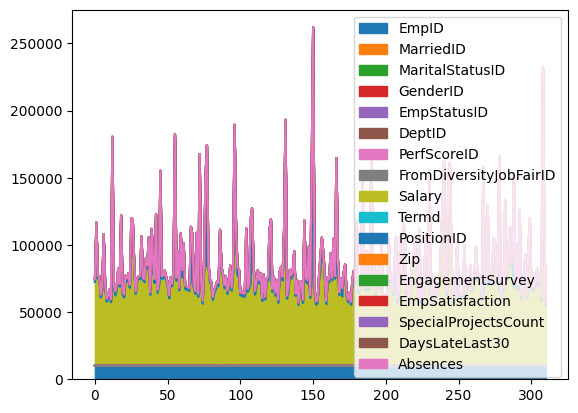

In [20]:
# Penjumlahan data untuk masing-masing kolom 
HRdata.plot.area()

In [21]:
HRdata.dtypes

Employee_Name                  object
EmpID                           int64
MarriedID                       int64
MaritalStatusID                 int64
GenderID                        int64
EmpStatusID                     int64
DeptID                          int64
PerfScoreID                     int64
FromDiversityJobFairID          int64
Salary                          int64
Termd                           int64
PositionID                      int64
Position                       object
State                          object
Zip                             int64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                     object
DateofTermination              object
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerName 

/tmp/ipykernel_33/3787531892.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



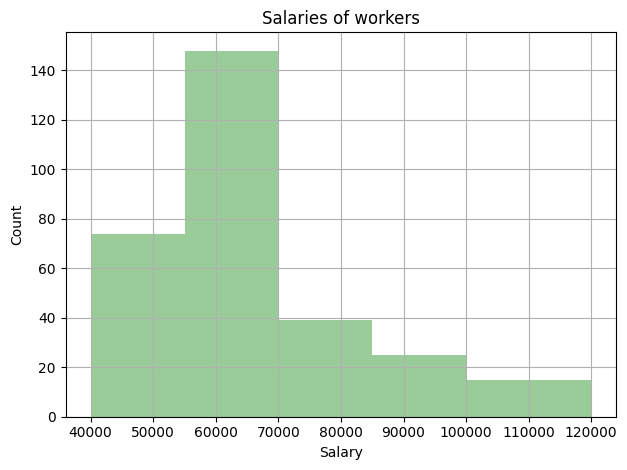

In [22]:
#Count of Worker Salaries (diagram batang)

bins=[40000,55000,70000,85000,100000,120000]
sns.distplot(HRdata.Salary,bins=bins,color="green",kde=False)
plt.title("Salaries of workers")
plt.xlabel("Salary")
plt.ylabel("Count")
plt.tight_layout()
plt.grid(True)
plt.show()

/tmp/ipykernel_33/3205601010.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



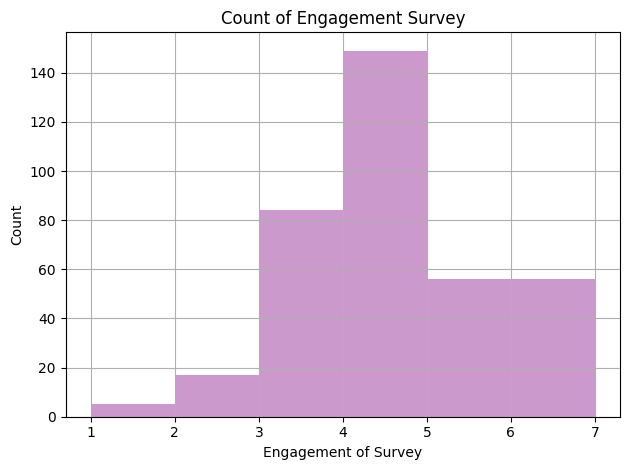

In [23]:
#Count of Engagement Survey (diagram batang)

bins=[1,2,3,4,5,7]
sns.distplot(HRdata.EngagementSurvey,bins=bins,color="purple",kde=False)
plt.title("Count of Engagement Survey")
plt.xlabel("Engagement of Survey")
plt.ylabel("Count")
plt.tight_layout()
plt.grid(True)
plt.show()

/tmp/ipykernel_33/919330293.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


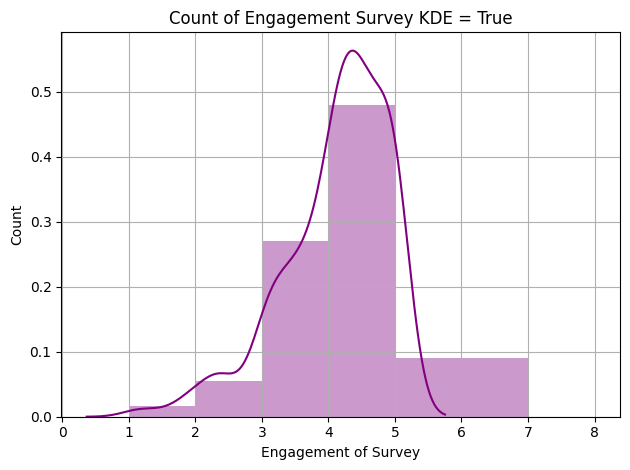

In [24]:
#Count of Engagement Survey (with KDE), tetep diagram batang

bins=[1,2,3,4,5,7,8]
sns.distplot(HRdata.EngagementSurvey,bins=bins,color="purple",kde=True)
plt.title("Count of Engagement Survey KDE = True")
plt.xlabel("Engagement of Survey")
plt.ylabel("Count")
plt.tight_layout()
plt.grid(True)
plt.show()

# Mengecek outlier pada data **dengan Boxplot**

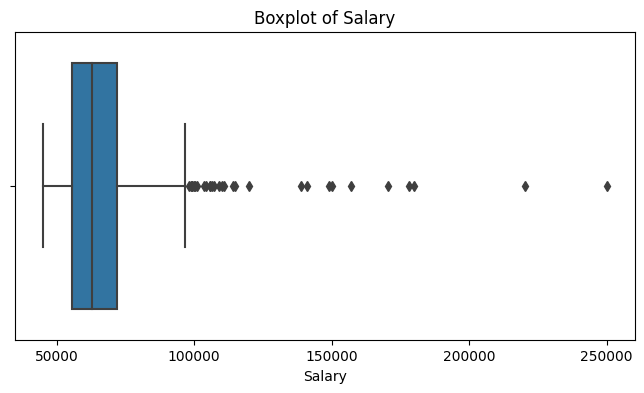

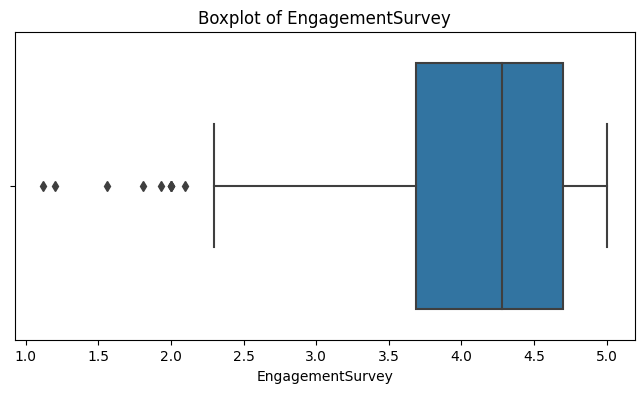

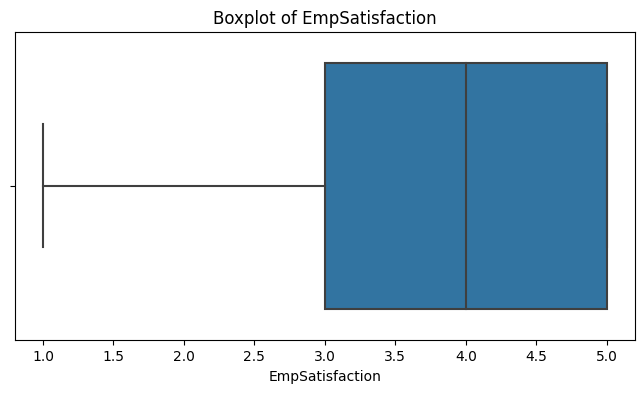

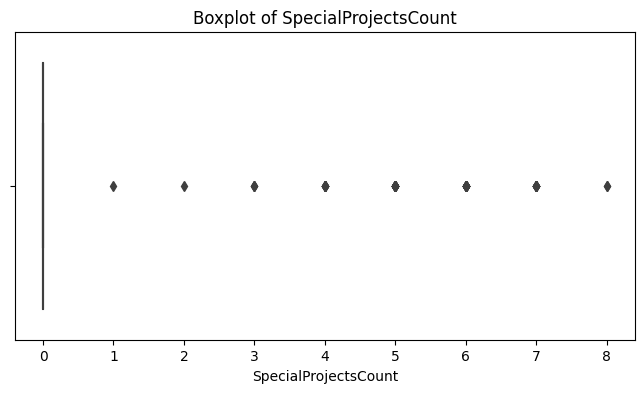

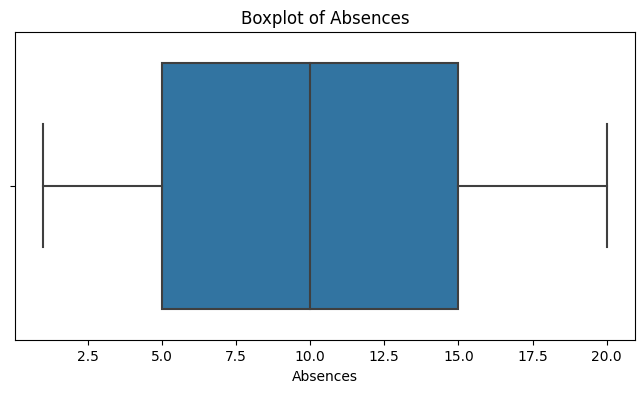

In [25]:
for i in ['Salary', 'EngagementSurvey', 'EmpSatisfaction','SpecialProjectsCount','Absences']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=HRdata[i])
    plt.title(f'Boxplot of {i}')
    plt.show()

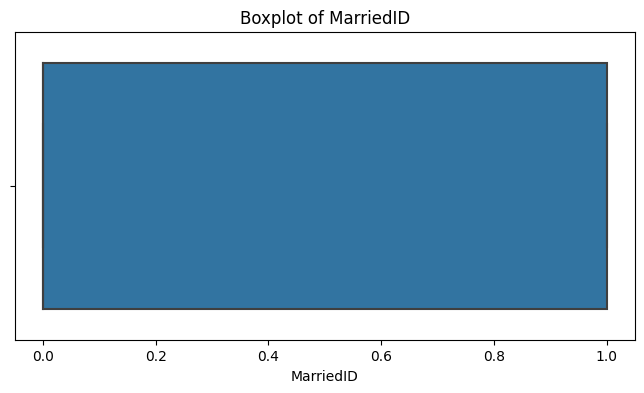

In [26]:
for i in ['MarriedID']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=HRdata[i])
    plt.title(f'Boxplot of {i}')
    plt.show()

**catatan**:
hasil mencari outlier dalam boxplot akan menjadi sia-sia bila data kolom yang digunakan adalah categorical

In [27]:
#AKAN ERROR hasilnya kalau cari data yang isi kolum nya kualitatif
for i in ['Position']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=HRdata[i])
    plt.title(f'Boxplot of {i}')
    plt.show()

TypeError: Horizontal orientation requires numeric `x` variable.

<Figure size 600x400 with 0 Axes>

# Scatter Plot

<Axes: xlabel='Salary', ylabel='ManagerName'>

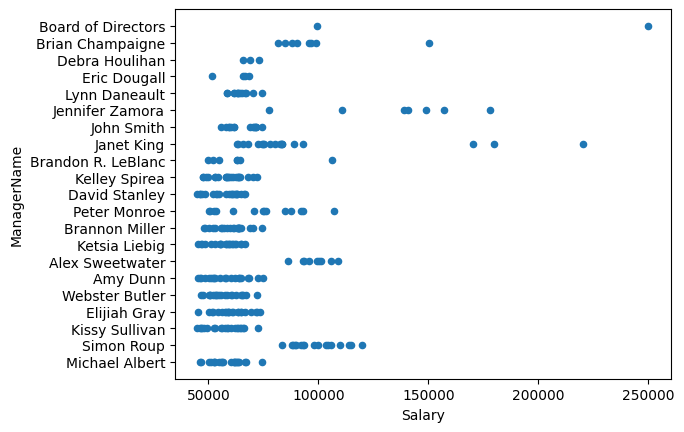

In [28]:
#manager subordinates salary in scatter plot
HRdata.plot.scatter(9,26)

# Salary Based on State

<Axes: xlabel='Salary', ylabel='State'>

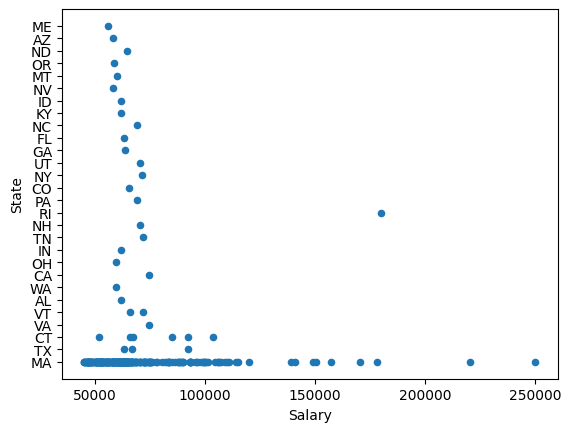

In [29]:
HRdata.plot.scatter(9,13)

**Massacushets employee tend to have bigger salary**

# salary range based on marriage

<Axes: xlabel='Salary', ylabel='MarriedID'>

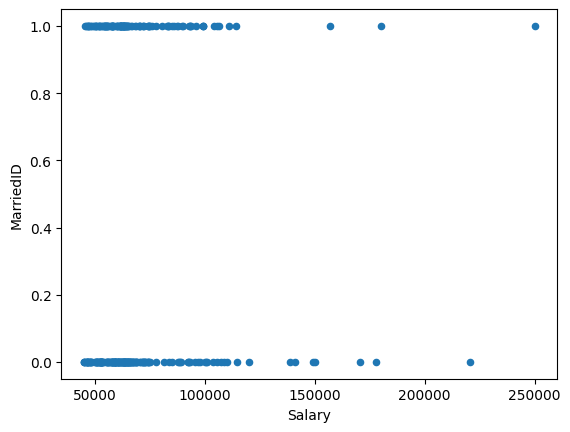

In [30]:
HRdata.plot.scatter(9,2)

# 1. Bagaimana cara meningkatkan 'PerformanceScore' ?

Perlu mentransformasi terlebih dahulu beberapa kolom/variabel dengan data categorical ke numerical, agar dapat terbentuk matriks korelasi

In [31]:
# Melihat data unik dari kolom PerformanceScore
unique_performance_scores = HRdata['PerformanceScore'].unique()

# Menampilkan hasil
print("Unique Performance Scores:")
print(unique_performance_scores)

Unique Performance Scores:
['Exceeds' 'Fully Meets' 'Needs Improvement' 'PIP']


In [32]:
# Membuat peta untuk mengubah kategori menjadi data numerik
performance_score_mapping = {
    'Exceeds': 4,
    'Fully Meets': 3,
    'Needs Improvement': 2,
    'PIP': 1
}

# Menggunakan map untuk mengubah nilai kategori menjadi data numerik
HRdata['PerformanceScoreNumeric'] = HRdata['PerformanceScore'].map(performance_score_mapping)

# Menampilkan hasil
print(HRdata[['PerformanceScore', 'PerformanceScoreNumeric']])

    PerformanceScore  PerformanceScoreNumeric
0            Exceeds                        4
1        Fully Meets                        3
2        Fully Meets                        3
3        Fully Meets                        3
4        Fully Meets                        3
..               ...                      ...
306      Fully Meets                        3
307              PIP                        1
308          Exceeds                        4
309      Fully Meets                        3
310      Fully Meets                        3

[311 rows x 2 columns]


In [39]:
# Melihat data unik dari kolom EmploymentStatus
unique_performance_scores_EMPstatus = HRdata['EmploymentStatus'].unique()

# Menampilkan hasil
print("Unique Performance Scores EMP status:")
print(unique_performance_scores_EMPstatus)

Unique Performance Scores EMP status:
['Active' 'Voluntarily Terminated' 'Terminated for Cause']


In [40]:
pd.get_dummies(HRdata['EmploymentStatus'])

,Active,Terminated for Cause,Voluntarily Terminated
0,True,False,False
1,False,False,True
2,False,False,True
3,True,False,False
4,False,False,True
...,...,...,...
306,True,False,False
307,False,False,True
308,True,False,False
309,True,False,False


In [41]:
# Membuat peta untuk mengubah kategori menjadi data numerik
employment_status_mapping = {
    'Active': 3,
    'Voluntarily Terminated': 2,
    'Terminated for Cause': 1
}

# Menggunakan map untuk mengubah nilai kategori menjadi data numerik
HRdata['EmploymentStatusNumeric'] = HRdata['EmploymentStatus'].map(employment_status_mapping)

# Menampilkan hasil
print(HRdata[['EmploymentStatus', 'EmploymentStatusNumeric']])

           EmploymentStatus  EmploymentStatusNumeric
0                    Active                        3
1    Voluntarily Terminated                        2
2    Voluntarily Terminated                        2
3                    Active                        3
4    Voluntarily Terminated                        2
..                      ...                      ...
306                  Active                        3
307  Voluntarily Terminated                        2
308                  Active                        3
309                  Active                        3
310                  Active                        3

[311 rows x 2 columns]


In [43]:
# Mengambil kolom-kolom yang berkaitan dengan kinerja
# kolom PerformanceScore sudah diubah menjadi numerik
performance_columns = ['PerformanceScoreNumeric','EmploymentStatusNumeric','PositionID','MaritalStatusID', 'EngagementSurvey', 'EmpSatisfaction', 'SpecialProjectsCount','Salary','Absences']

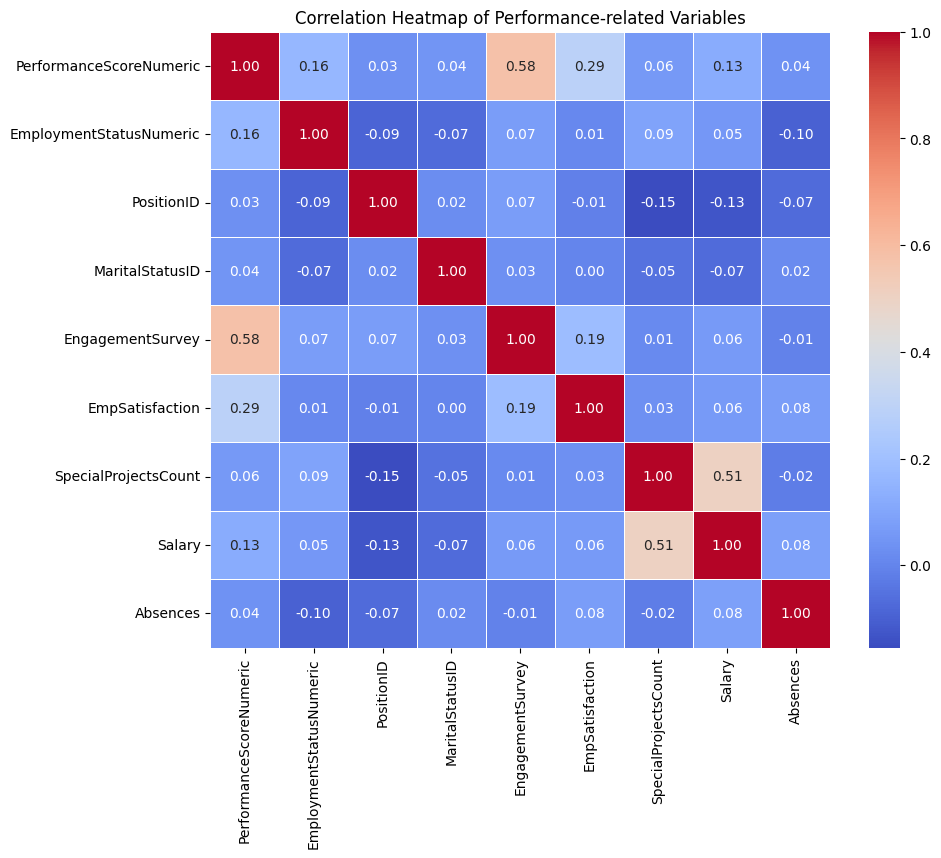

In [44]:
# Matriks korelasi
performance_corr = HRdata[performance_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(performance_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Performance-related Variables')
plt.show()

# Kesimpulan

Berdasarkan matriks korelasi tsb, variabel performance score memiliki korelasi tertinggi dengan variabel engagement survey. Dengan nilai korelasi diantara keduanya sebesar 0,58. Di posisi kedua variabel performance score dengan variabel salary memiliki posisi 0,51.

untuk korelasi antara performance score dengan salary terlihat masuk akal, namun ada beberapa alasan yang setidaknya masuk akal akan korelasi performance score dengan engagement survey tsb yaitu sbb:

1. Kausalitas Sebab-Akibat:

Ada kemungkinan bahwa tingkat keterlibatan (engagement) karyawan secara langsung memengaruhi kinerja mereka. Karyawan yang lebih terlibat cenderung bekerja lebih efisien, berkontribusi lebih, dan mendapatkan penilaian kinerja yang lebih tinggi.

2. Pengaruh Variabel Lain:

Mungkin ada variabel lain yang secara tidak langsung memengaruhi keduanya. Misalnya, faktor lingkungan kerja, dukungan manajerial, atau keadilan dalam organisasi dapat berdampak pada kinerja dan juga menciptakan persepsi karyawan terhadap tingkat keterlibatan mereka.

3. Efek Loop Balik:

Korelasi yang teramati mungkin mencerminkan hubungan timbal balik antara kinerja dan keterlibatan. Karyawan yang berkinerja baik mungkin merasa lebih terlibat, dan sebaliknya, karyawan yang merasa terlibat mungkin memiliki kinerja yang lebih baik.

# 2. Bagaimana cara menaikan Employee Satisfaction ?

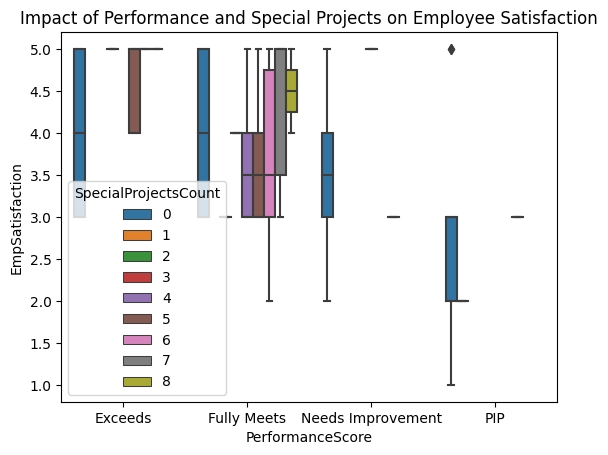

In [45]:
# Analisis performa dan proyek khusus
sns.boxplot(x='PerformanceScore', y='EmpSatisfaction', hue='SpecialProjectsCount', data=HRdata)
plt.title('Impact of Performance and Special Projects on Employee Satisfaction')
plt.show()

Terlihat dari Boxplot tsb bahwa beberapa faktor satisfaction dari karyawan ditentukan oleh Special Projects Count (kepuasan akan prestasi yang diperoleh dirinya sendiri), utamanya faktor satisfaction ditentukan dari Performance Score

# 3. Bagaimana cara meningkatkan engagement survey karyawan ?

In [46]:
# Melihat data unik dari kolom EngagementSurvey
unique_performance_scores_ENGAGEsurvey = HRdata['EngagementSurvey'].unique()

# Menampilkan hasil
print("Unique Performance Scores ENGAGE survey:")
print(unique_performance_scores_ENGAGEsurvey)

Unique Performance Scores ENGAGE survey:
[4.6  4.96 3.02 4.84 5.   3.04 4.46 4.2  4.28 4.4  4.5  2.   4.8  3.5
 3.39 3.35 3.19 3.14 4.51 3.25 3.84 4.43 3.3  3.8  3.   4.3  3.58 4.7
 4.1  4.13 3.7  4.73 4.12 4.62 3.1  3.96 3.79 1.93 1.12 3.01 2.3  3.88
 3.4  4.11 4.77 4.52 2.9  2.1  4.   3.13 1.56 1.2  4.76 3.66 3.73 4.24
 3.97 3.9  4.61 4.63 4.64 4.17 3.6  3.03 4.48 3.24 3.72 2.34 3.99 3.75
 3.07 4.83 3.49 3.38 3.65 4.78 4.9  4.88 4.53 3.18 4.65 3.08 3.93 4.18
 4.37 2.39 3.81 4.29 2.33 4.25 3.89 3.54 2.4  3.45 4.16 3.17 4.15 3.98
 4.36 3.69 4.94 2.6  3.51 3.31 4.81 3.32 4.68 3.27 1.81 4.21 2.44 2.81
 4.33 3.21 3.11 2.5  3.42 4.07 3.2 ]


<Axes: >

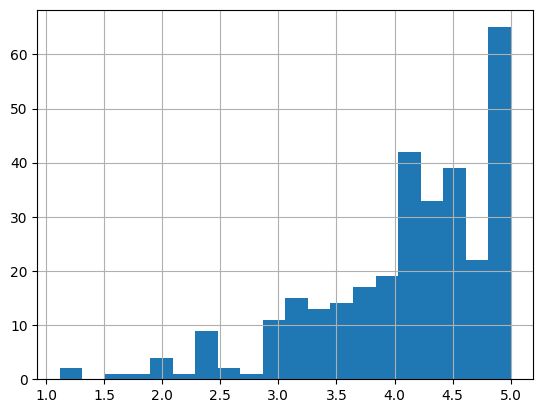

In [47]:
#Plot data kolom EngagementSurvey
HRdata['EngagementSurvey'].describe()
HRdata['EngagementSurvey'].hist(bins=20)

Berdasarkan plot diatas tsb, Engagement Survey Rate karyawan mayoritas tinggi (4.0 - 5.0)

In [48]:
# K-Means Clustering

from sklearn.cluster import KMeans

X = HRdata[['EmpSatisfaction', 'Salary', 'SpecialProjectsCount']]
kmeans = KMeans(n_clusters=3, random_state=42)
HRdata['EngagementCluster'] = kmeans.fit_predict(X)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


In [49]:
#Untuk melihat summary dari klaster untuk data kolom EngagementCluster
cluster_summary = HRdata.groupby('EngagementCluster').agg({'EmpSatisfaction': 'mean', 'Salary': 'mean', 'SpecialProjectsCount': 'mean'})
print(cluster_summary)

                   EmpSatisfaction         Salary  SpecialProjectsCount
EngagementCluster                                                      
0                         3.880478   59715.709163              0.426295
1                         4.200000  173504.700000              4.000000
2                         3.880000   94834.860000              4.640000


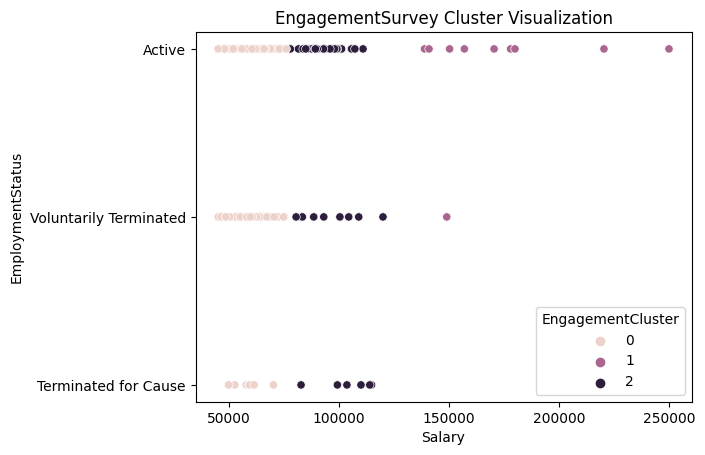

In [45]:
import seaborn as sns
sns.scatterplot(x='Salary', y='EmploymentStatus', hue='EngagementCluster', data=HRdata)
plt.title('EngagementSurvey Cluster Visualization')
plt.show()

Berdasarkan output EngagementSurvey Cluster Visualization diatas tsb, maka diperkirakan faktor yang dapat meningkatkan Engagement Survey adalah 'Salary'. Hasil diatas akan lebih akurat bila menggunakan correlation heatmap.

# 4. Bagaimana efek menaikan gaji pada Performance Score, Employee Satisfaction, dan Employee Engagement

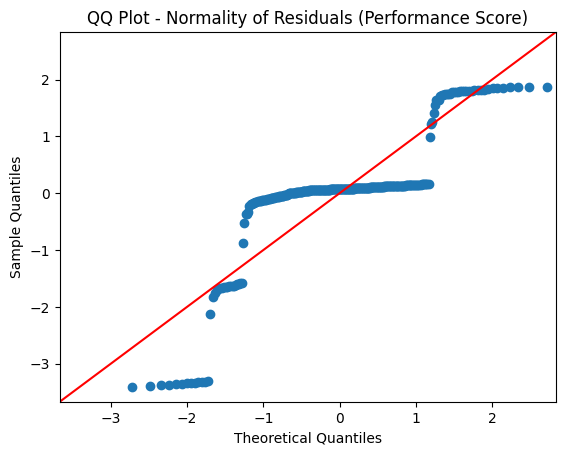

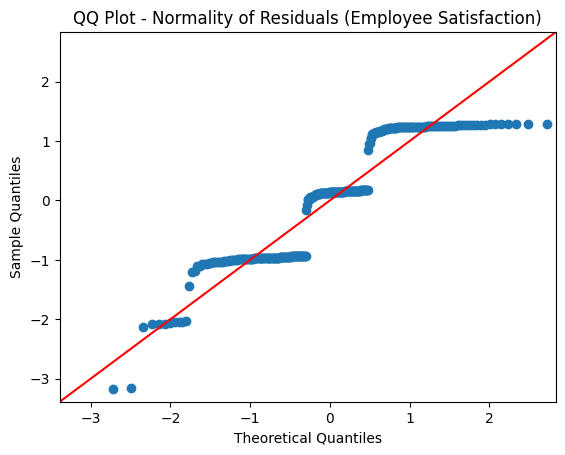

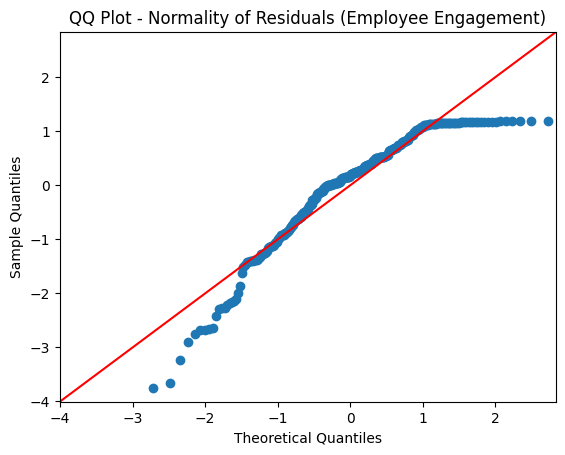

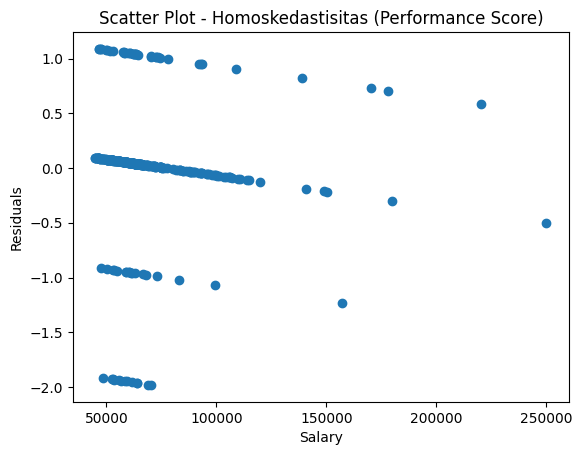

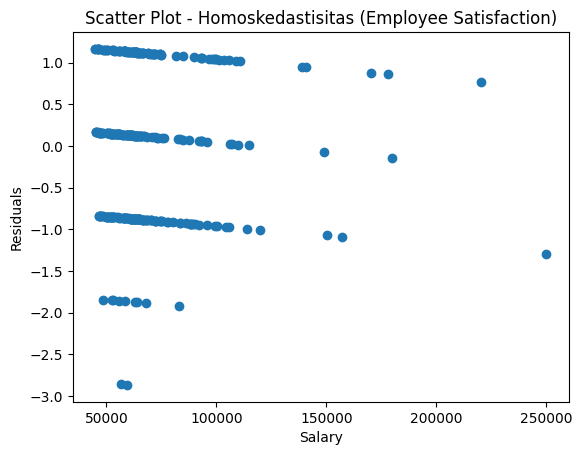

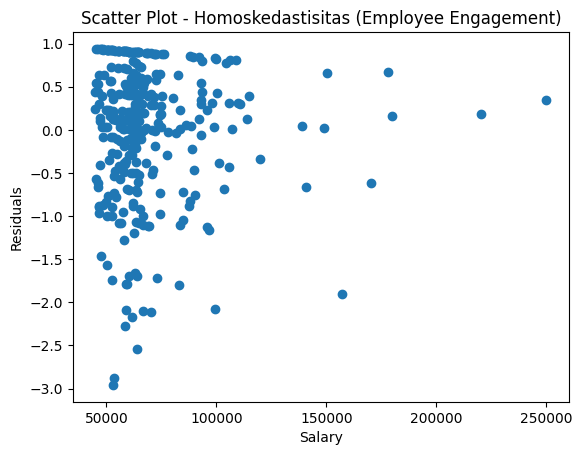

In [50]:
import statsmodels.api as sm
import scipy.stats as stats

# Variabel dependen
y_PerformanceScore = HRdata['PerformanceScoreNumeric']
y_EmpSatisfaction = HRdata['EmpSatisfaction']
y_EngagementSurvey = HRdata['EngagementSurvey']

# Variabel independen
X = sm.add_constant(HRdata['Salary'])

# Membuat model regresi untuk Performance Score
model_PerformanceScore = sm.OLS(y_PerformanceScore, X).fit()

# Membuat model regresi untuk Employee Satisfaction
model_EmpSatisfaction = sm.OLS(y_EmpSatisfaction, X).fit()

# Membuat model regresi untuk Employee Engagement
model_EngagementSurvey = sm.OLS(y_EngagementSurvey, X).fit()

# Mengekstrak residual dari masing-masing model
residuals_PerformanceScore = model_PerformanceScore.resid
residuals_EmpSatisfaction = model_EmpSatisfaction.resid
residuals_EngagementSurvey = model_EngagementSurvey.resid

# Uji normalitas menggunakan Shapiro-Wilk test
shapiro_test_PerformanceScore = stats.shapiro(residuals_PerformanceScore)
shapiro_test_EmpSatisfaction = stats.shapiro(residuals_EmpSatisfaction)
shapiro_test_EngagementSurvey = stats.shapiro(residuals_EngagementSurvey)

# Plot QQ plot untuk Performance Score
sm.qqplot(residuals_PerformanceScore, line='45', fit=True)
plt.title('QQ Plot - Normality of Residuals (Performance Score)')
plt.show()

# Plot QQ plot untuk Employee Satisfaction
sm.qqplot(residuals_EmpSatisfaction, line='45', fit=True)
plt.title('QQ Plot - Normality of Residuals (Employee Satisfaction)')
plt.show()

# Plot QQ plot untuk Employee Engagement
sm.qqplot(residuals_EngagementSurvey, line='45', fit=True)
plt.title('QQ Plot - Normality of Residuals (Employee Engagement)')
plt.show()

# Scatter plot untuk mengecek homoskedastisitas
plt.scatter(HRdata['Salary'], residuals_PerformanceScore)
plt.title('Scatter Plot - Homoskedastisitas (Performance Score)')
plt.xlabel('Salary')
plt.ylabel('Residuals')
plt.show()
    
plt.scatter(HRdata['Salary'], residuals_EmpSatisfaction)
plt.title('Scatter Plot - Homoskedastisitas (Employee Satisfaction)')
plt.xlabel('Salary')
plt.ylabel('Residuals')
plt.show()

plt.scatter(HRdata['Salary'], residuals_EngagementSurvey)
plt.title('Scatter Plot - Homoskedastisitas (Employee Engagement)')
plt.xlabel('Salary')
plt.ylabel('Residuals')
plt.show()


In [54]:
#UNTUK MENJAWAB PERTANYAAN "APAKAH SEMAKIN TINGGI SALARY YANG DIPEROLEH MAKA SEMAKIN TINGGI JUGA SATISTFACTION DARI KARYAWAN TSB ?"

import statsmodels.api as sm

# Menentukan variabel dependen dan independen
y = HRdata['EmpSatisfaction']
X = sm.add_constant(HRdata['Salary'])

# Membuat model regresi
model = sm.OLS(y, X).fit()

# Menampilkan hasil regresi
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        EmpSatisfaction   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.220
Date:                Mon, 18 Mar 2024   Prob (F-statistic):              0.270
Time:                        01:33:58   Log-Likelihood:                -410.59
No. Observations:                 311   AIC:                             825.2
Df Residuals:                     309   BIC:                             832.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7342      0.151     24.776      0.0

**Perlu diperhatikan beberapa hal berikut berdasarkan output diatas:**

1. P>|t| (p-value):

P-value untuk "Salary" adalah 0.270, yang lebih besar dari tingkat signifikansi umum 0.05. Ini menunjukkan bahwa "Salary" tidak signifikan secara statistik terhadap "EmpSatisfaction" dalam model ini.
Prob (F-statistic):

2. Probabilitas F-statistic adalah 0.270, yang juga menunjukkan bahwa model secara keseluruhan tidak signifikan secara statistik.
Omnibus, Jarque-Bera, Skew, Kurtosis:

3. Omnibus, Jarque-Bera, Skew, dan Kurtosis memberikan informasi tentang distribusi residual. Dalam hal ini, Omnibus dan Jarque-Bera menyiratkan bahwa residual tidak terdistribusi normal.
Durbin-Watson:

4. Durbin-Watson mengukur otonomikorelasi residual. Nilai mendekati 2 menunjukkan sedikit otonomikorelasi. Dalam hal ini, nilainya 2.144, yang menunjukkan adanya sedikit otonomikorelasi.

**Koefisien Salary yang kecil (2.04e-06) dan P-value yang besar (0.270) menunjukkan bahwa tidak ada hubungan yang signifikan antara Salary dan EngagementSurvey dalam model regresi tersebut. P-value yang tinggi menunjukkan bahwa kita tidak dapat menolak hipotesis nol (tidak ada hubungan).**

In [55]:
#UNTUK MENJAWAB PERTANYAAN "APAKAH SEMAKIN TINGGI SALARY YANG DIPEROLEH MAKA SEMAKIN TINGGI JUGA ENGAGEMENT DARI KARYAWAN TSB UNTUK MENGISI ANGKET?"

import statsmodels.api as sm

# Menentukan variabel dependen dan independen
y = HRdata['EngagementSurvey']
X = sm.add_constant(HRdata['Salary'])

# Membuat model regresi
model = sm.OLS(y, X).fit()

# Menampilkan hasil regresi
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       EngagementSurvey   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.310
Date:                Mon, 18 Mar 2024   Prob (F-statistic):              0.253
Time:                        01:34:17   Log-Likelihood:                -366.80
No. Observations:                 311   AIC:                             737.6
Df Residuals:                     309   BIC:                             745.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9692      0.131     30.316      0.0

**Perlu diperhatikan beberapa hal berikut berdasarkan output diatas:**

1. P>|t| (p-value):

P-value untuk "Salary" adalah 0.253, yang lebih besar dari tingkat signifikansi umum 0.05. Ini menunjukkan bahwa "Salary" tidak signifikan secara statistik terhadap "EmpSatisfaction" dalam model ini.
Prob (F-statistic):

2. Probabilitas F-statistic adalah 1.310, yang juga menunjukkan bahwa model secara keseluruhan tidak signifikan secara statistik.
Omnibus, Jarque-Bera, Skew, Kurtosis:

3. Omnibus, Jarque-Bera, Skew, dan Kurtosis memberikan informasi tentang distribusi residual. Dalam hal ini, Omnibus dan Jarque-Bera menyiratkan bahwa residual tidak terdistribusi normal.
Durbin-Watson:

4. Durbin-Watson mengukur otonomikorelasi residual. Nilai mendekati 2 menunjukkan sedikit otonomikorelasi. Dalam hal ini, nilainya 1.929, yang menunjukkan adanya sedikit otonomikorelasi.

**Koefisien Salary yang kecil (2.04e-06) dan P-value yang besar (0.253) menunjukkan bahwa tidak ada hubungan yang signifikan antara Salary dan EngagementSurvey dalam model regresi tersebut. P-value yang tinggi menunjukkan bahwa kita tidak dapat menolak hipotesis nol (tidak ada hubungan).**

In [53]:
#UNTUK MENJAWAB PERTANYAAN "APAKAH SEMAKIN TINGGI SALARY YANG DIPEROLEH MAKA SEMAKIN TINGGI JUGA SKOR PERFORMA DARI KARYAWAN TSB ?"


import statsmodels.api as sm

# Menentukan variabel dependen dan independen
y = HRdata['PerformanceScoreNumeric']
X = sm.add_constant(HRdata['Salary'])

# Membuat model regresi
model = sm.OLS(y, X).fit()

# Menampilkan hasil regresi
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     PerformanceScoreNumeric   R-squared:                       0.016
Model:                                 OLS   Adj. R-squared:                  0.012
Method:                      Least Squares   F-statistic:                     4.916
Date:                     Mon, 18 Mar 2024   Prob (F-statistic):             0.0273
Time:                             01:31:17   Log-Likelihood:                -272.69
No. Observations:                      311   AIC:                             549.4
Df Residuals:                          309   BIC:                             556.9
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

**Perlu diperhatikan beberapa hal berikut berdasarkan output diatas:**

1. P>|t| (p-value):

P-value untuk "Salary" adalah 0.027, yang lebih kecil dari tingkat signifikansi umum 0.05. Ini menunjukkan bahwa faktor "Salary" signifikan secara statistik terhadap "EmpSatisfaction" dalam model ini.
Prob (F-statistic):

2. Probabilitas F-statistic adalah 4.196, sebenarnya secara F-Statistic menunjukkan bahwa model secara keseluruhan tidak signifikan secara statistik.

3. Omnibus, Jarque-Bera, Skew, dan Kurtosis memberikan informasi tentang distribusi residual. Dalam hal ini, Omnibus dan Jarque-Bera menyiratkan bahwa residual tidak terdistribusi normal.
Durbin-Watson:

4. Durbin-Watson mengukur otonomikorelasi residual. Nilai mendekati 2 menunjukkan sedikit otonomikorelasi. Dalam hal ini, nilainya 1.929, yang menunjukkan adanya sedikit otonomikorelasi.

**Koefisien Salary yang kecil (2.92e-06) dan P-value yang kecil (0.027) menunjukkan bahwa terdapat hubungan yang signifikan antara Salary dan EngagementSurvey dalam model regresi tersebut. P-value yang rendah menunjukkan bahwa kita dapat menolak hipotesis nol (tidak ada hubungan).**

# 5. Apakah ada pengaruh bulan perusahaan melakukan rekrutmen karyawan dengan 'PerformanceScore', 'EmpSatisfaction', dan 'EngagementSurvey' karyawan tsb ?

In [56]:
#Melihat isi data kolom DateofHire:
print(HRdata['DateofHire'])

0       7/5/2011
1      3/30/2015
2       7/5/2011
3       1/7/2008
4      7/11/2011
         ...    
306     7/7/2014
307     9/2/2008
308    4/10/2010
309    3/30/2015
310    9/29/2014
Name: DateofHire, Length: 311, dtype: object


In [57]:
#Konversi data pada kolum DateofHire ke angka (angka yang menunjukan nama bulan)

import pandas as pd

# Konversi kolom 'DateofHire' ke format tanggal
HRdata['DateofHire'] = pd.to_datetime(HRdata['DateofHire'])

# Ekstrak bulan dari tanggal
HRdata['HireMonthNumeric'] = HRdata['DateofHire'].dt.month

# Menampilkan hasil
print(HRdata[['HireMonthNumeric']])


     HireMonthNumeric
0                   7
1                   3
2                   7
3                   1
4                   7
..                ...
306                 7
307                 9
308                 4
309                 3
310                 9

[311 rows x 1 columns]


In [58]:
# Dictionary untuk mapping angka bulan ke nama bulan
month_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

# Menggunakan map untuk mengubah angka bulan menjadi nama bulan
HRdata['MonthName'] = HRdata['HireMonthNumeric'].map(month_mapping)

# Menampilkan hasil
print(HRdata[['MonthName']])

     MonthName
0         July
1        March
2         July
3      January
4         July
..         ...
306       July
307  September
308      April
309      March
310  September

[311 rows x 1 columns]


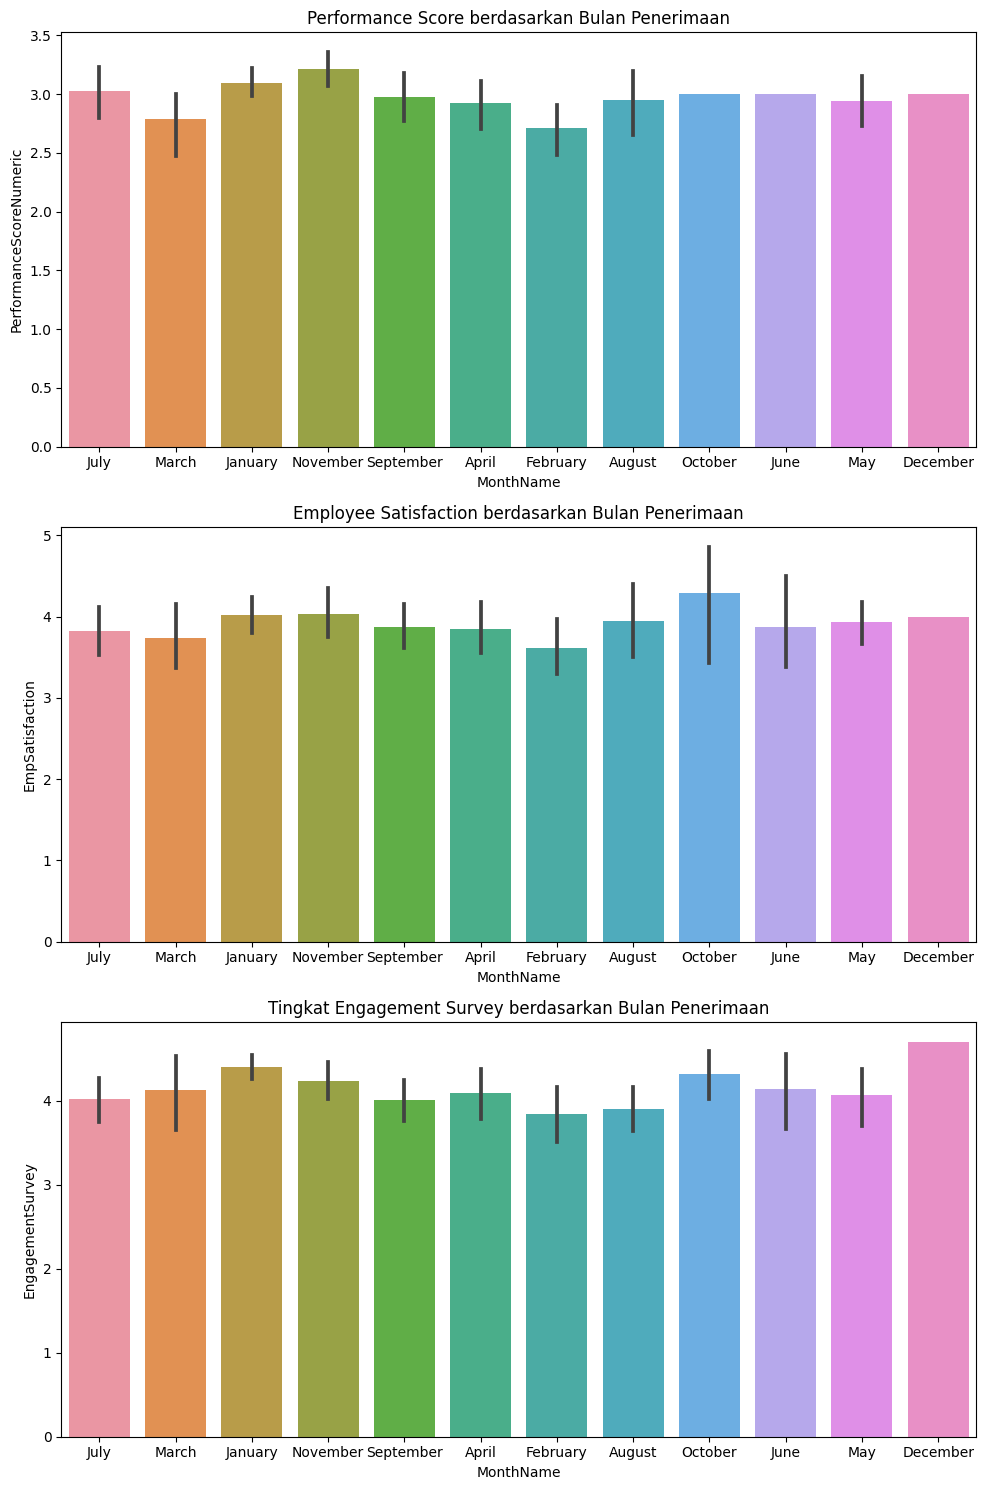

In [59]:
#import seaborn as sns
#import matplotlib.pyplot as plt      #library sudah di running sebelumnya

# Ukuran figsize yang diinginkan
fig, axes = plt.subplots(3, 1, figsize=(10, 15))  # Ganti ukuran sesuai kebutuhan

# Plotting performance berdasarkan bulan
sns.barplot(ax=axes[0], x='MonthName', y='PerformanceScoreNumeric', data=HRdata)
axes[0].set_title('Performance Score berdasarkan Bulan Penerimaan')

# Plotting satisfaction berdasarkan bulan
sns.barplot(ax=axes[1], x='MonthName', y='EmpSatisfaction', data=HRdata)
axes[1].set_title('Employee Satisfaction berdasarkan Bulan Penerimaan')

# Plotting engagement berdasarkan bulan
sns.barplot(ax=axes[2], x='MonthName', y='EngagementSurvey', data=HRdata)
axes[2].set_title('Tingkat Engagement Survey berdasarkan Bulan Penerimaan')

# Menampilkan plot
plt.tight_layout()
plt.show()


Bila hanya mengacu pada hasil ketiga diagram batang diatas tsb, maka tidak ada pengaruh bulan yang signifikan terhadap hal apabila perusahaan melakukan rekrutmen karyawan dikaitkan dengan performance, satisfaction, dan engagement karyawan yang bersangkutan

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


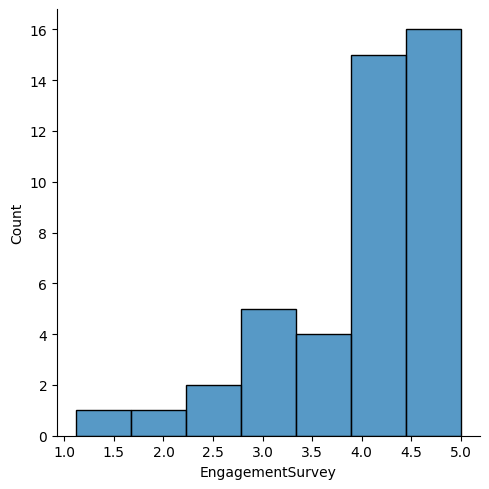

In [60]:
tes = HRdata[HRdata["MonthName"] == "July"]
sns.displot(data=tes, x='EngagementSurvey')

# Catatan
Misal data analyst akan mengajukan nama-nama bulan yang pantas untuk HR melakukan recruitment, kita bisa asumsikan misal di bulan tertentu (contoh Oktober-Januari sedang winter season), maka seorang data analyst mempropose asumsi subjektif (MISAL: data analyst punya asumsi kalau recruitment di winter season ga bagus, karena pengaruh cuaca yang berakibat pada performance karyawan yg direkrut pada bulan-bulan tsb. Oleh karena itu dapat dilihat distribusi nya PER BULAN, dengan catatan kita punya asumsi subjektif. Bila tidak punya asumsi subjektif maka KITA HARUS ASUMSIKAN bahwasannya data PerformanceScore bulan juli itu berdistribusi normal.

Kalau mau pakai uji-t, harus sama jumlah data nya (misal bulan ada 12 data, dan Engagement Survey Rate cuman ada 4 data), solusi nya pakai ANOVA. Kalau pakai MANOVA bisa langsung buat liat hubungan tiga-tiga nya (1. apakah ada pengaruh bulan bila perusahaan hire karyawan dengan performance, 2. satisfaction, dan 3. engagement karyawan tsb)

Pakai ANOVA = Banyak Input hasil nya/output nya cuman 1
Pakai MANOVA = Banyak input, output nya juga banyak (COCOK UNTUK buat liat hubungan tiga-tiga nya 1. apakah ada pengaruh bulan bila perusahaan hire karyawan dengan performance, 2. satisfaction, dan 3. engagement karyawan tsb

In [61]:
HRdata['EngagementSurveyNumericFromFloat'] = pd.to_numeric(HRdata['EngagementSurvey'], errors='coerce').astype(int)
print(HRdata['EngagementSurveyNumericFromFloat'])

0      4
1      4
2      3
3      4
4      5
      ..
306    4
307    3
308    4
309    5
310    4
Name: EngagementSurveyNumericFromFloat, Length: 311, dtype: int64


In [65]:
# tipe data masih int 32, agar data ini dapat dipakai untuk pengujian MANOVA, maka harus diubah tipe data nya menjadi numerik int64
print(HRdata['HireMonthNumeric'])

0      7
1      3
2      7
3      1
4      7
      ..
306    7
307    9
308    4
309    3
310    9
Name: HireMonthNumeric, Length: 311, dtype: int32


In [210]:
months_recruitment

const    float64
2           bool
3           bool
4           bool
5           bool
6           bool
7           bool
8           bool
9           bool
10          bool
11          bool
12          bool
dtype: object

In [246]:
# Cara ubah kolom HireMonthNumeric ke dtype kolom numeric
#pd.get_dummies(HRdata['HireMonthNumeric'], drop_first=True)
tes = sm.add_constant(pd.get_dummies(HRdata['HireMonthNumeric'], drop_first=True))
tes = tes[tes.columns[1:]].replace({True:1,False:0})
tes.dtypes

/tmp/ipykernel_33/2318375584.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


2     int64
3     int64
4     int64
5     int64
6     int64
7     int64
8     int64
9     int64
10    int64
11    int64
12    int64
dtype: object

In [102]:
from statsmodels.multivariate.manova import MANOVA
from sklearn.datasets import load_iris
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA

# Variabel dependen (PerformanceScore, EmpSatisfaction, EngagementSurvey)
dependent_variables = HRdata[['PerformanceScoreNumeric', 'EmpSatisfaction', 'EngagementSurveyNumericFromFloat']]

# Variabel independen (bulan rekrutmen)
months_recruitment = pd.get_dummies(HRdata['HireMonthNumeric'], drop_first=False)
months_recruitment = months_recruitment[months_recruitment.columns[0:]].replace({True:1,False:0})

# Melakukan analisis MANOVA
manova_model = MANOVA(exog=dependent_variables.to_numpy(), endog=months_recruitment.to_numpy())



/tmp/ipykernel_33/2114716083.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


In [67]:
# Mengecek data-data pada kolom variabel dependen nya
dependent_variables

,PerformanceScoreNumeric,EmpSatisfaction,EngagementSurveyNumericFromFloat
0,4,5,4
1,3,3,4
2,3,3,3
3,3,5,4
4,3,4,5
...,...,...,...
306,3,4,4
307,1,2,3
308,4,5,4
309,3,3,5


In [68]:
# Perhitungan MANOVA nya
print(manova_model.mv_test())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
           x0           Value   Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.8087 12.0000 297.0000  5.8530 0.0000
         Pillai's trace 0.1913 12.0000 297.0000  5.8530 0.0000
 Hotelling-Lawley trace 0.2365 12.0000 297.0000  5.8530 0.0000
    Roy's greatest root 0.2365 12.0000 297.0000  5.8530 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
           x1           Value   Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.7753 12.0000 297.0000  7.1733 0.0000
         Pillai's trace 0.2247 12.0000 297.0000  7.1733 0.0000
 Hotelling-

**Berdasarkan hasil MANOVA diatas, terlihat bahwa ketiga p-value dari 3 variabel dependen tsb kurang dari 0,05. Maka dapat disimpulkan bahwasannya terdapat pengaruh ketiga variabel tsb terhadap bulan perusahaan melakukan rekrutmen**

# 6. Dari orang-orang yang resign tetapi performanya diatas rata-rata, kenapa orang-orang tsb resign ? 

In [69]:
# Melihat data unik dari kolom 'TermReason'
unique_performance_scores_PerformScore = HRdata['TermReason'].unique()
print(unique_performance_scores_PerformScore)

['N/A-StillEmployed' 'career change' 'hours' 'return to school'
 'Another position' 'unhappy' 'attendance' 'performance'
 'Learned that he is a gangster' 'retiring' 'relocation out of area'
 'more money' 'military' 'no-call, no-show' 'Fatal attraction'
 'maternity leave - did not return' 'medical issues' 'gross misconduct']


In [92]:
# Membuat kolom baru 'Exceeds_Flag' dengan nilai 1 bila kategori 'PerformanceScore' adalah 'Exceeds', dan 0 jika tidak
HRdata['Exceeds_Flag'] = (HRdata['PerformanceScore'] == 'Exceeds').astype(int)

# Menampilkan hasil
print(HRdata[['PerformanceScore', 'Exceeds_Flag']])

    PerformanceScore  Exceeds_Flag
0            Exceeds             1
1        Fully Meets             0
2        Fully Meets             0
3        Fully Meets             0
4        Fully Meets             0
..               ...           ...
306      Fully Meets             0
307              PIP             0
308          Exceeds             1
309      Fully Meets             0
310      Fully Meets             0

[311 rows x 2 columns]


# Menggunakan WordCloud

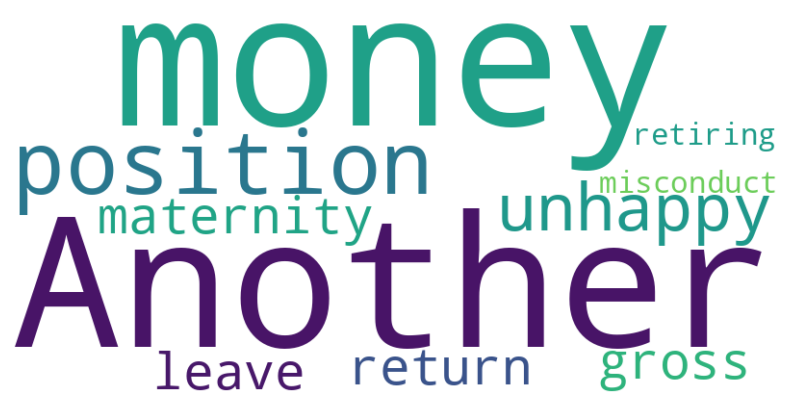

In [95]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Menggabungkan semua alasan pemutusan kecuali 'N/A-StillEmployed'
tes = HRdata[HRdata["Exceeds_Flag"] == 1]
all_reasons_except_still_employed = ' '.join(reason for reason in tes['TermReason'] if reason != 'N/A-StillEmployed')

# Membuat objek WordCloud
wordcloud_except_still_employed = WordCloud(width=800, height=400, background_color='white').generate(all_reasons_except_still_employed)

# Menampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_except_still_employed, interpolation='bilinear')
plt.axis('off')
plt.show()


In [94]:
all_reasons_except_still_employed

'more money Another position Another position more money unhappy maternity leave - did not return gross misconduct retiring'

**Dari WordCloud tsb diketahui bahwasannya para ex karyawan yang resign meskipun performance score mereka diatas rata-rata (kategori exceeds) adalah utamanya karena faktor 'Money' dan 'Another Position'.**

# 7. Dari orang-orang yang resign dan satisfaction nya diatas rata-rata, kenapa karyawan-karyawan tsb resign ?

Solusi nomor 12 juga bisa menggunakan ANOVA dengan catatan kolom 'Term Reason' nya di buat kategorik numerik terlebih dahulu

In [78]:
# Menghitung mean dari kolom 'EmpSatisfaction'
emp_satisfaction_mean = HRdata['EmpSatisfaction'].mean()
emp_satisfaction_mean

3.8906752411575565

In [79]:
# Membuat kolom baru 'Above_Avg_EmpSatisfaction' dengan nilai 1 bila kategori 'EmpSatisfaction' diatas rata-rata (3.8906752411575565)
HRdata['Above_Avg_EmpSatisfaction'] = HRdata['EmpSatisfaction'] > emp_satisfaction_mean

# Menampilkan hasil
print(HRdata[['EmpSatisfaction', 'Above_Avg_EmpSatisfaction']])

     EmpSatisfaction  Above_Avg_EmpSatisfaction
0                  5                       True
1                  3                      False
2                  3                      False
3                  5                       True
4                  4                       True
..               ...                        ...
306                4                       True
307                2                      False
308                5                       True
309                3                      False
310                5                       True

[311 rows x 2 columns]


In [183]:
# CARA LAIN MENAMBAHKAN KOLOM BARU KE DATASET

# Pilih karyawan yang memiliki 'Exceeds_Flag' dan nilai 'Above_Avg_EmpSatisfaction'
Exceeds_Flag_AND_avg_satisfaction = HRdata[(HRdata['Exceeds_Flag'] == True) & (HRdata['Above_Avg_EmpSatisfaction'] == True)]

# Tampilkan hasil
print(Exceeds_Flag_AND_avg_satisfaction)

          Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
143     Johnson, George  10034          1                1         1   
174      Lynch, Lindsay  10004          0                0         0   
212    Patronick, Lucas  10005          0                0         1   
217      Peters, Lauren  10032          1                1         0   
265  Squatrito, Kristen  10030          0                2         0   
289    Veera, Abdellah   10014          0                2         1   
293       Volk, Colleen  10022          1                1         0   

     EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  ...  \
143            5       5            4                       0   46837  ...   
174            5       5            4                       1   47434  ...   
212            5       4            4                       1  108987  ...   
217            5       5            4                       0   57954  ...   
265            5       5         

In [81]:
# Melihat data unik dari kolom EmpSatisfaction
unique_performance_scores_PerformScore = HRdata['EmpSatisfaction'].unique()

# Menambahkan kolom baru 'Above_Avg_EmpSatisfaction' dengan kondisi
HRdata['Above_Avg_EmpSatisfaction'] = (HRdata['EmpSatisfaction'] > emp_satisfaction_mean) & (HRdata['DateofTermination'].apply(lambda x: str(x).strip() != '0'))

# Menampilkan hasil
print(HRdata[['EmpSatisfaction', 'DateofTermination', 'Above_Avg_EmpSatisfaction']])


     EmpSatisfaction DateofTermination  Above_Avg_EmpSatisfaction
0                  5                 0                      False
1                  3         6/16/2016                      False
2                  3         9/24/2012                      False
3                  5                 0                      False
4                  4          9/6/2016                       True
..               ...               ...                        ...
306                4                 0                      False
307                2         9/29/2015                      False
308                5                 0                      False
309                3                 0                      False
310                5                 0                      False

[311 rows x 3 columns]


# Menggunakan WordCloud

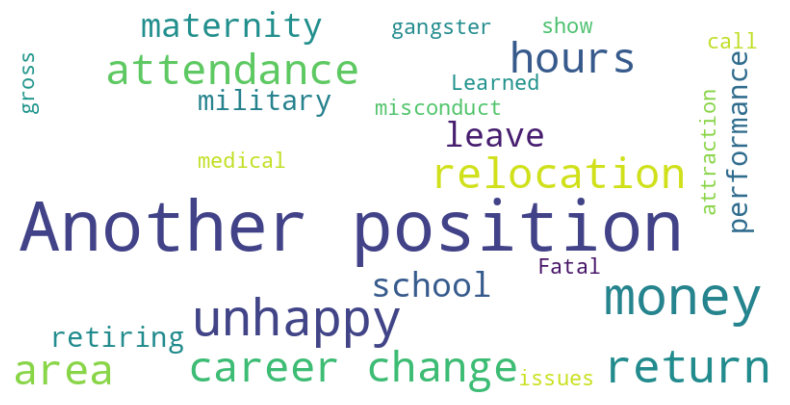

In [83]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Menggabungkan semua alasan pemutusan kecuali 'N/A-StillEmployed'
tes = HRdata[HRdata["Above_Avg_EmpSatisfaction"] == 1]
all_reasons_except_still_employed = ' '.join(reason for reason in tes['TermReason'] if reason != 'N/A-StillEmployed')

# Membuat objek WordCloud
wordcloud_except_still_employed = WordCloud(width=800, height=400, background_color='white').generate(all_reasons_except_still_employed)

# Menampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_except_still_employed, interpolation='bilinear')
plt.axis('off')
plt.show()


**Berdasarkan WordCloud diatas tsb, dapat disimpulkan bahwa karyawan yang resign meskipun satisfaction nya diatas rata-rata (satisfaction score above 3,8) ialah karena faktor 'Another Position in another company or else", 'Unhappy', 'Money', 'Career Change', 'Area', 'Attendance', dan 'Return'.**

# 8. Dari orang-orang yang resign dan engagement nya diatas rata-rata kenapa dia resign ?

In [99]:
# Menghitung mean dari kolom 'EngagementSurvey'
engage_survey_mean = HRdata['EngagementSurvey'].mean()
print(engage_survey_mean)

# Membuat kolom baru 'Above_Avg_EngagementSurvey' dengan nilai 1 bila kategori 'EngagementSurvey' di atas rata-rata (4.11)
HRdata['Above_Avg_EngagementSurvey'] = HRdata['EngagementSurvey'] > engage_survey_mean

# Menampilkan hasil
print(HRdata[['EmpSatisfaction', 'Above_Avg_EngagementSurvey']])


4.11
     EmpSatisfaction  Above_Avg_EngagementSurvey
0                  5                        True
1                  3                        True
2                  3                       False
3                  5                        True
4                  4                        True
..               ...                         ...
306                4                       False
307                2                       False
308                5                        True
309                3                        True
310                5                        True

[311 rows x 2 columns]


**Berdasarkan hasil diatas tsb, rata-rata dari kolom engagement survey adalah 4.11**

In [100]:
# Menambahkan kolom baru 'Above_Avg_EngagementSurvey' dengan kondisi
HRdata['Above_Avg_EngagementSurvey'] = (HRdata['EngagementSurvey'] > engage_survey_mean) & (~HRdata['DateofTermination'].isna())

# Mengganti nilai NaN dengan False pada kolom 'Above_Avg_EngagementSurvey'
HRdata['Above_Avg_EngagementSurvey'] = HRdata['Above_Avg_EngagementSurvey'].fillna(False)

# Menampilkan hasil
print(HRdata[['EngagementSurvey', 'DateofTermination', 'Above_Avg_EngagementSurvey']])


     EngagementSurvey DateofTermination  Above_Avg_EngagementSurvey
0                4.60                 0                        True
1                4.96         6/16/2016                        True
2                3.02         9/24/2012                       False
3                4.84                 0                        True
4                5.00          9/6/2016                        True
..                ...               ...                         ...
306              4.07                 0                       False
307              3.20         9/29/2015                       False
308              4.60                 0                        True
309              5.00                 0                        True
310              4.50                 0                        True

[311 rows x 3 columns]


# Menggunakan WordCloud

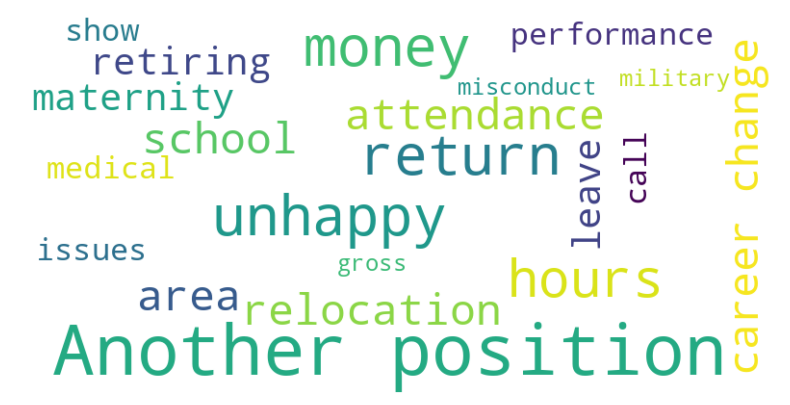

In [101]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Menggabungkan semua alasan pemutusan kecuali 'N/A-StillEmployed'
tes = HRdata[HRdata["Above_Avg_EngagementSurvey"] == 1]
all_reasons_except_still_employed = ' '.join(reason for reason in tes['TermReason'] if reason != 'N/A-StillEmployed')

# Membuat objek WordCloud
wordcloud_except_still_employed = WordCloud(width=800, height=400, background_color='white').generate(all_reasons_except_still_employed)

# Menampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_except_still_employed, interpolation='bilinear')
plt.axis('off')
plt.show()


**Berdasarkan hasil WordCloud diatas tsb, maka disimpulkan bahwa faktor-faktor utama penyabab ex karyawan dengan tingkat engagement rate diatas rata-rata tsb resign adalah utamanya karena faktor 'Another Position'. Selain itu ada faktor 'Unhappy', 'Money', dan 'Return'.**

# 9. Apakah ada pengaruh Divisi dengan Performance Score, Employee Satisfaction, dan Engagement Survey

**9.1 Pengaruh divisi terhadap performance score**

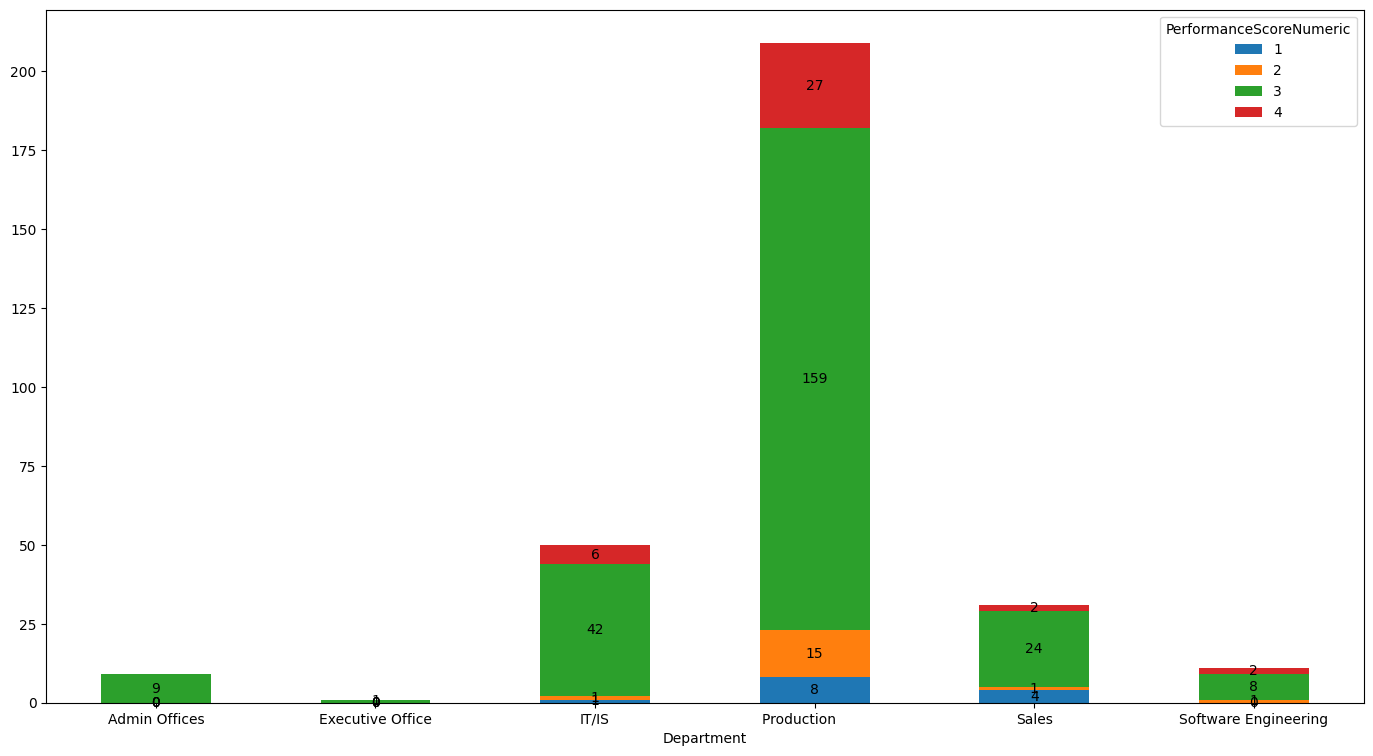

In [137]:
JobSourceVSPerfScore = pd.crosstab(HRdata.Department, HRdata.PerformanceScoreNumeric)

#Plotting bar chart nya
ax = JobSourceVSPerfScore.plot(kind='bar',figsize=(17,9),stacked= True, rot =0, label = True)
for c in ax.containers:
    ax.bar_label(c, label_type='center')

**9.2 Pengaruh divisi terhadap employee satisfaction**

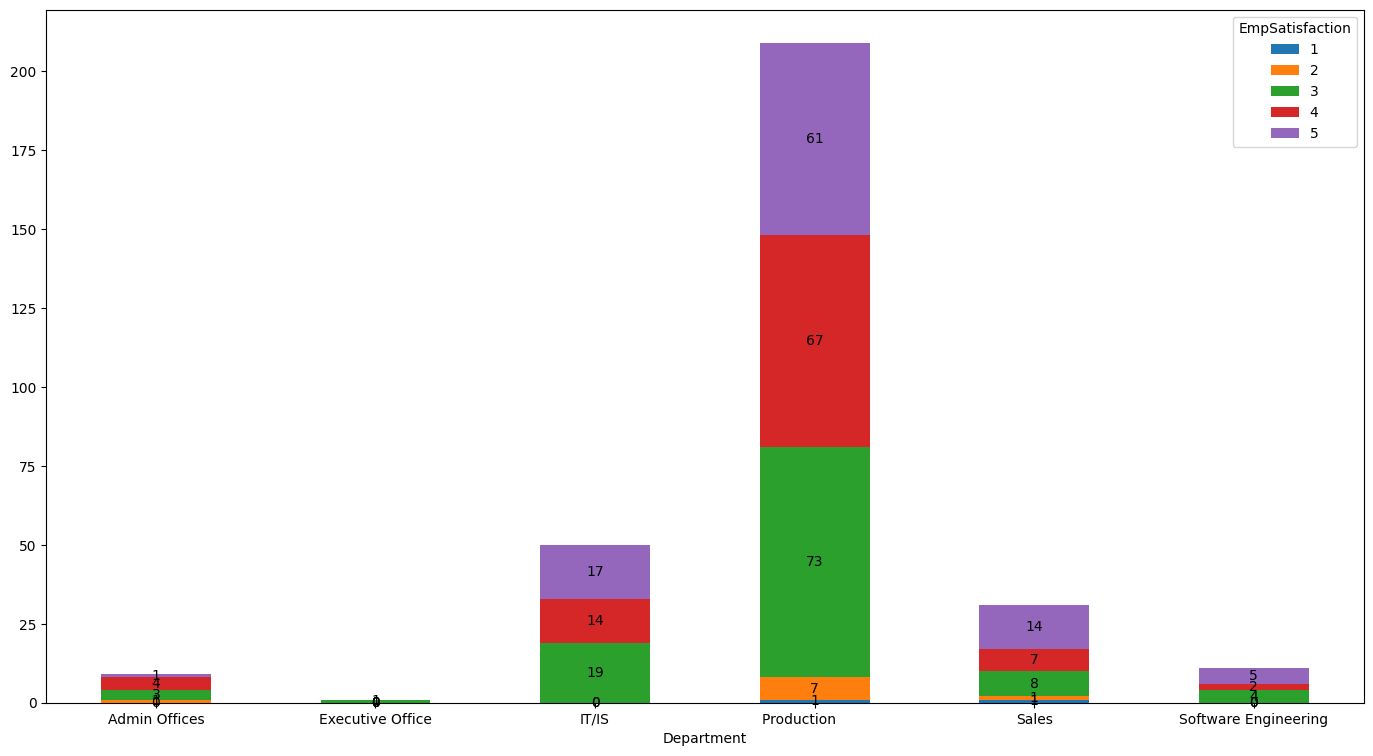

In [138]:
JobSourceVSPerfScore = pd.crosstab(HRdata.Department, HRdata.EmpSatisfaction)

#Plotting bar chart nya
ax = JobSourceVSPerfScore.plot(kind='bar',figsize=(17,9),stacked= True, rot =0, label = True)
for c in ax.containers:
    ax.bar_label(c, label_type='center')

**9.3 Pengaruh divisi terhadap engagement survey**

In [139]:
# Membuat fungsi untuk mengubah rentang nilai
def map_engagement_survey(value):
    if value >= 0 and value <= 1:
        return 1
    elif value > 1 and value <= 2:
        return 2
    elif value > 2 and value <= 3:
        return 3
    elif value > 3 and value <= 4:
        return 4
    elif value > 4 and value <= 5:
        return 5
    else:
        return None  # Untuk penanganan nilai di luar rentang yang diberikan

# Menerapkan fungsi ke kolom 'EngagementSurvey' untuk membuat kolom baru 'NewEngagementSurvey'
HRdata['RoundingEngagementSurvey'] = HRdata['EngagementSurvey'].apply(map_engagement_survey)

# Menampilkan hasil
print(HRdata[['EngagementSurvey', 'RoundingEngagementSurvey']])


     EngagementSurvey  RoundingEngagementSurvey
0                4.60                         5
1                4.96                         5
2                3.02                         4
3                4.84                         5
4                5.00                         5
..                ...                       ...
306              4.07                         5
307              3.20                         4
308              4.60                         5
309              5.00                         5
310              4.50                         5

[311 rows x 2 columns]


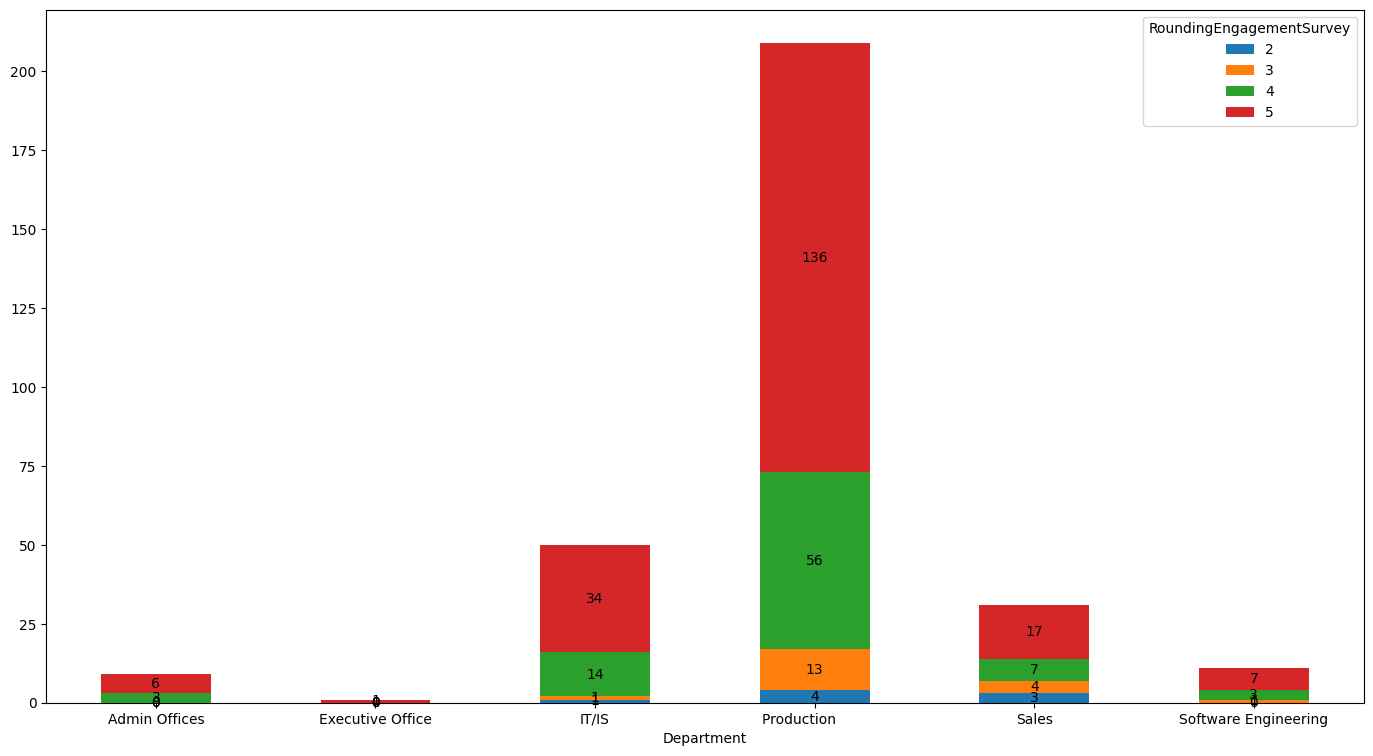

In [140]:
JobSourceVSPerfScore = pd.crosstab(HRdata.Department, HRdata.RoundingEngagementSurvey)

#Plotting bar chart nya
ax = JobSourceVSPerfScore.plot(kind='bar',figsize=(17,9),stacked= True, rot =0, label = True)
for c in ax.containers:
    ax.bar_label(c, label_type='center')

# Menggunakan analisis MANOVA

In [107]:
# Menampilkan nilai unik dari kolom 'Department'
print("Nilai unik dari kolom 'Department':", HRdata['Department'].unique())


Nilai unik dari kolom 'Department': ['Production       ' 'IT/IS' 'Software Engineering' 'Admin Offices'
 'Sales' 'Executive Office']


In [110]:
# Menggunakan metode factorize untuk mentransformasi nilai unik kolom Department menjadi angka
HRdata['DepartmentNumeric'], unique_dept = pd.factorize(HRdata['Department'])

# Menampilkan hasil transformasi
print("Nilai unik dari kolom 'Department' setelah diubah menjadi numerik:")
print(unique_dept)
print("Data setelah transformasi:")
print(HRdata[['Department', 'DepartmentNumeric']])


Nilai unik dari kolom 'Department' setelah diubah menjadi numerik:
Index(['Production       ', 'IT/IS', 'Software Engineering', 'Admin Offices',
       'Sales', 'Executive Office'],
      dtype='object')
Data setelah transformasi:
            Department  DepartmentNumeric
0    Production                         0
1                IT/IS                  1
2    Production                         0
3    Production                         0
4    Production                         0
..                 ...                ...
306  Production                         0
307  Production                         0
308              IT/IS                  1
309              IT/IS                  1
310  Production                         0

[311 rows x 2 columns]


In [111]:
# Menampilkan semua kolom beserta tipe datanya
print(HRdata.dtypes)

Employee_Name                               object
EmpID                                        int64
MarriedID                                    int64
MaritalStatusID                              int64
GenderID                                     int64
EmpStatusID                                  int64
DeptID                                       int64
PerfScoreID                                  int64
FromDiversityJobFairID                       int64
Salary                                       int64
Termd                                        int64
PositionID                                   int64
Position                                    object
State                                       object
Zip                                          int64
DOB                                         object
Sex                                         object
MaritalDesc                                 object
CitizenDesc                                 object
HispanicLatino                 

In [122]:
#from statsmodels.multivariate.manova import MANOVA
#from sklearn.datasets import load_iris
#import statsmodels.api as sm
#from statsmodels.multivariate.manova import MANOVA

# Variabel dependen (PerformanceScore, EmpSatisfaction, EngagementSurvey)
dependent_variables = HRdata[['PerformanceScoreNumeric', 'EmpSatisfaction', 'EngagementSurveyNumericFromFloat']]

# Variabel independen (department_influence)
department_influence = pd.get_dummies(HRdata['DepartmentNumeric'], drop_first=False)
department_influence = department_influence[months_recruitment.columns[0:]].replace({True:1,False:0})

# Melakukan analisis MANOVA
manova_model = MANOVA(exog=dependent_variables.to_numpy(), endog=months_recruitment.to_numpy())



/tmp/ipykernel_33/2250560353.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


In [123]:
# Mengecek data-data pada kolom variabel dependen nya 
dependent_variables

,PerformanceScoreNumeric,EmpSatisfaction,EngagementSurveyNumericFromFloat
0,4,5,4
1,3,3,4
2,3,3,3
3,3,5,4
4,3,4,5
...,...,...,...
306,3,4,4
307,1,2,3
308,4,5,4
309,3,3,5


In [124]:
# Perhitungan MANOVA nya
print(manova_model.mv_test())

                  Multivariate linear model
                                                             
-------------------------------------------------------------
           x0           Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.8309 6.0000 303.0000 10.2742 0.0000
         Pillai's trace 0.1691 6.0000 303.0000 10.2742 0.0000
 Hotelling-Lawley trace 0.2035 6.0000 303.0000 10.2742 0.0000
    Roy's greatest root 0.2035 6.0000 303.0000 10.2742 0.0000
-------------------------------------------------------------
                                                             
-------------------------------------------------------------
           x1           Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.7706 6.0000 303.0000 15.0293 0.0000
         Pillai's trace 0.2294 6.0000 303.0000 15.0293 0.0000
 Hotelling-Lawley trace 0.

**Berdasarkan hasil MANOVA diatas, terlihat bahwa ketiga p-value dari 3 variabel dependen tsb kurang dari 0,05. Maka dapat disimpulkan bahwasannya terdapat pengaruh ketiga variabel tsb terhadap bulan perusahaan melakukan rekrutmen**

# 10. Apakah ada pengaruh Manager dengan performance score, employee satisfaction, dan engagement survey

**10.1 Apakah ada pengaruh Manager dengan PerformanceScore**

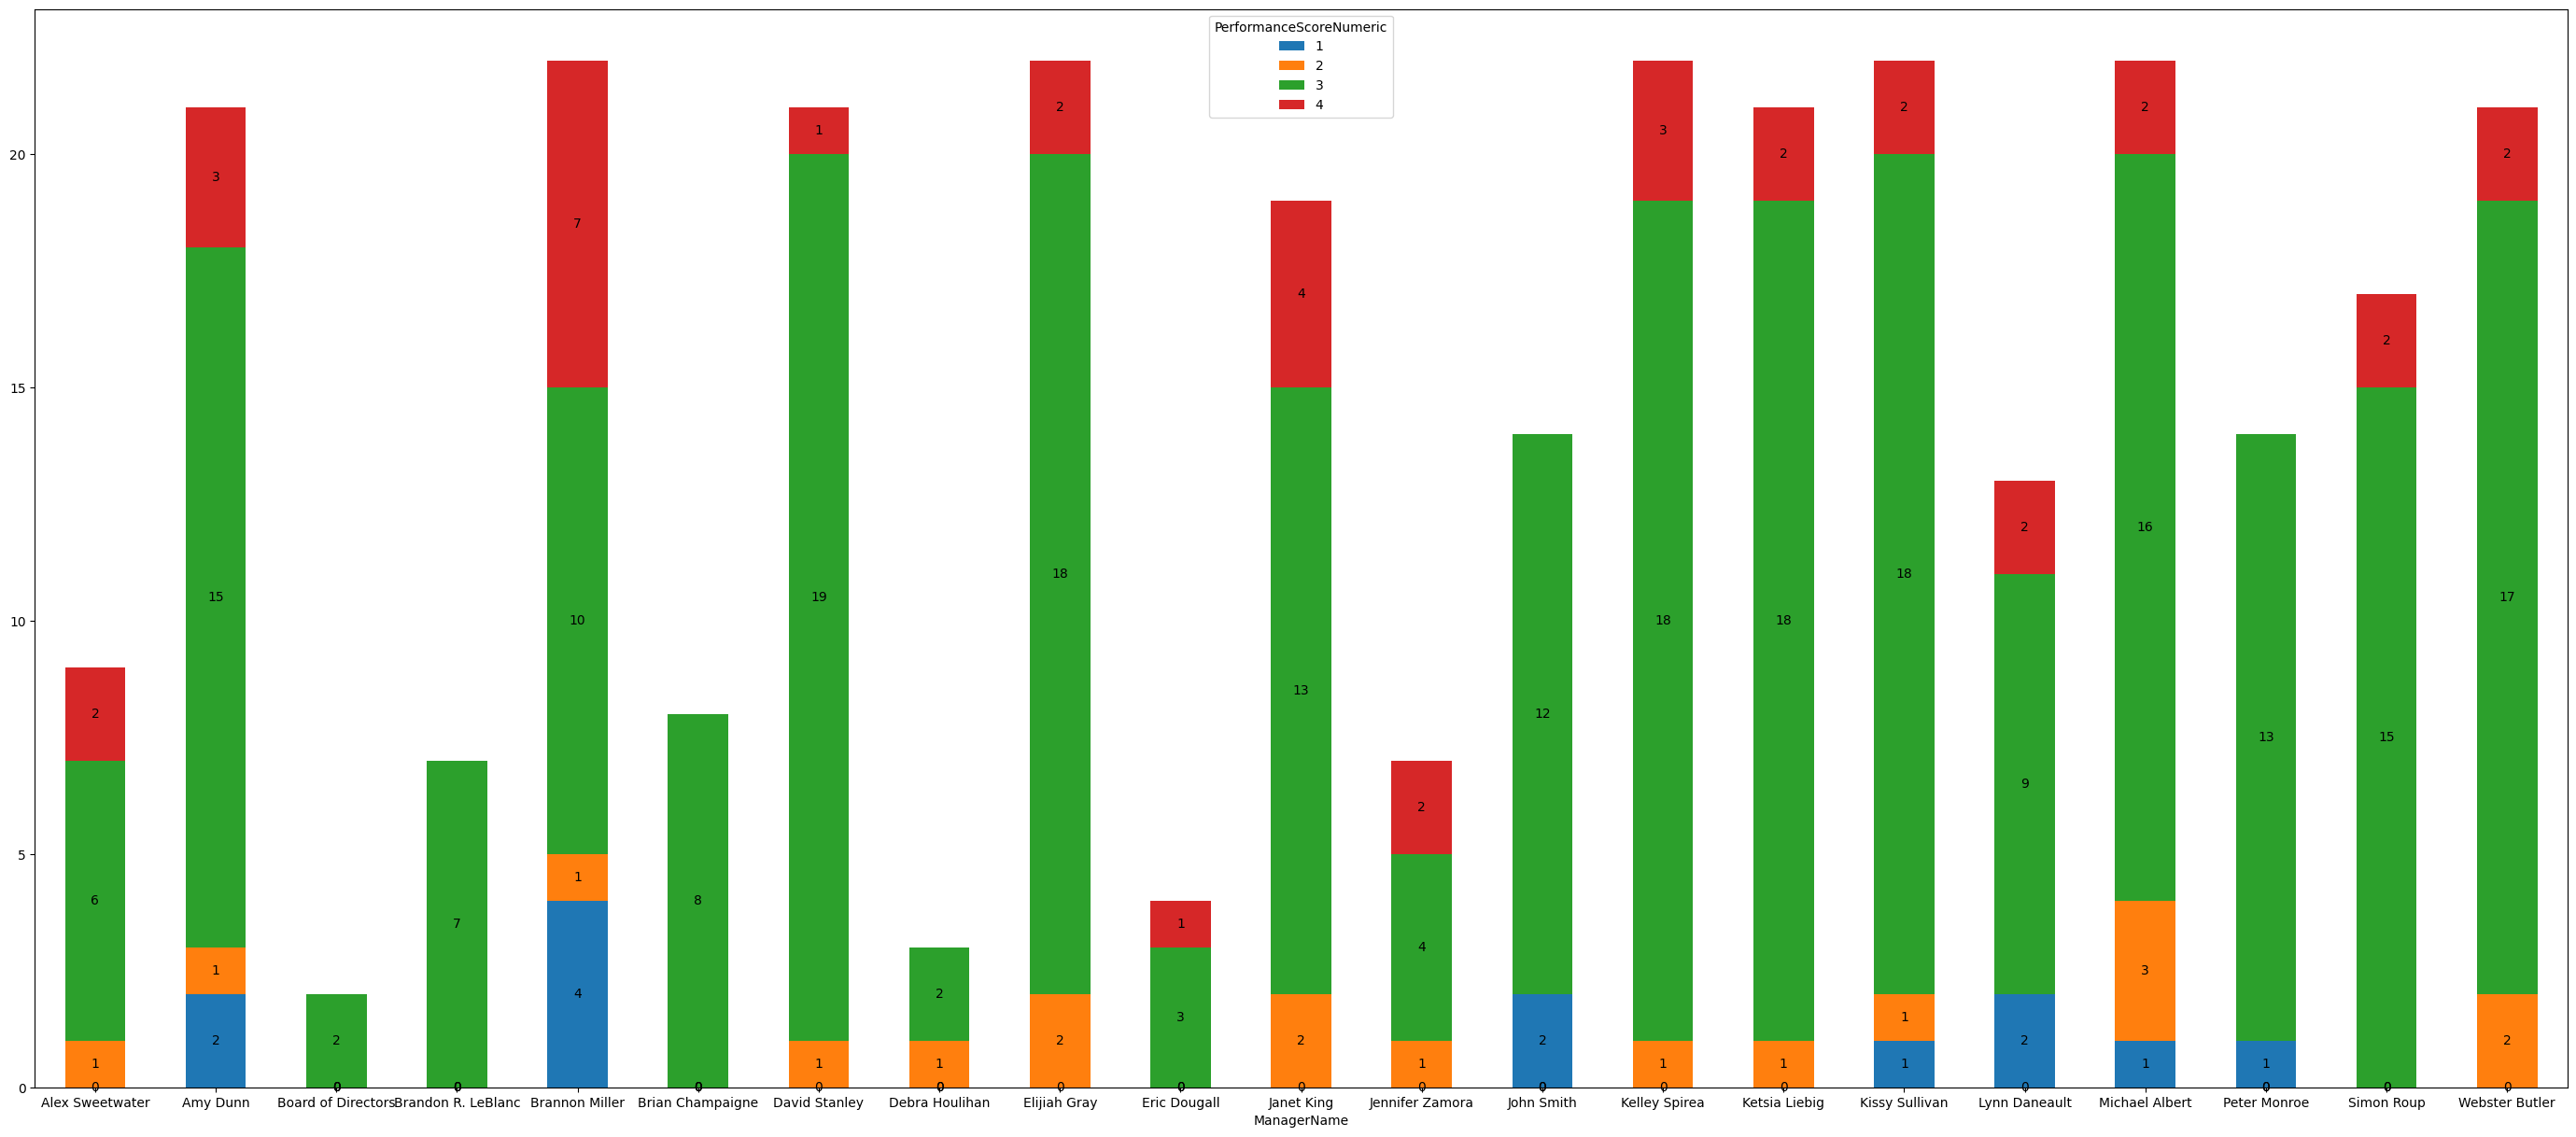

In [141]:
JobSourceVSPerfScore = pd.crosstab(HRdata.ManagerName, HRdata.PerformanceScoreNumeric)

#Plotting bar chart nya
ax = JobSourceVSPerfScore.plot(kind='bar',figsize=(35,15),stacked= True, rot =0, label = True)
for c in ax.containers:
    ax.bar_label(c, label_type='center')

**10.2 Apakah ada pengaruh Manager dengan EmployeeSatisfaction**

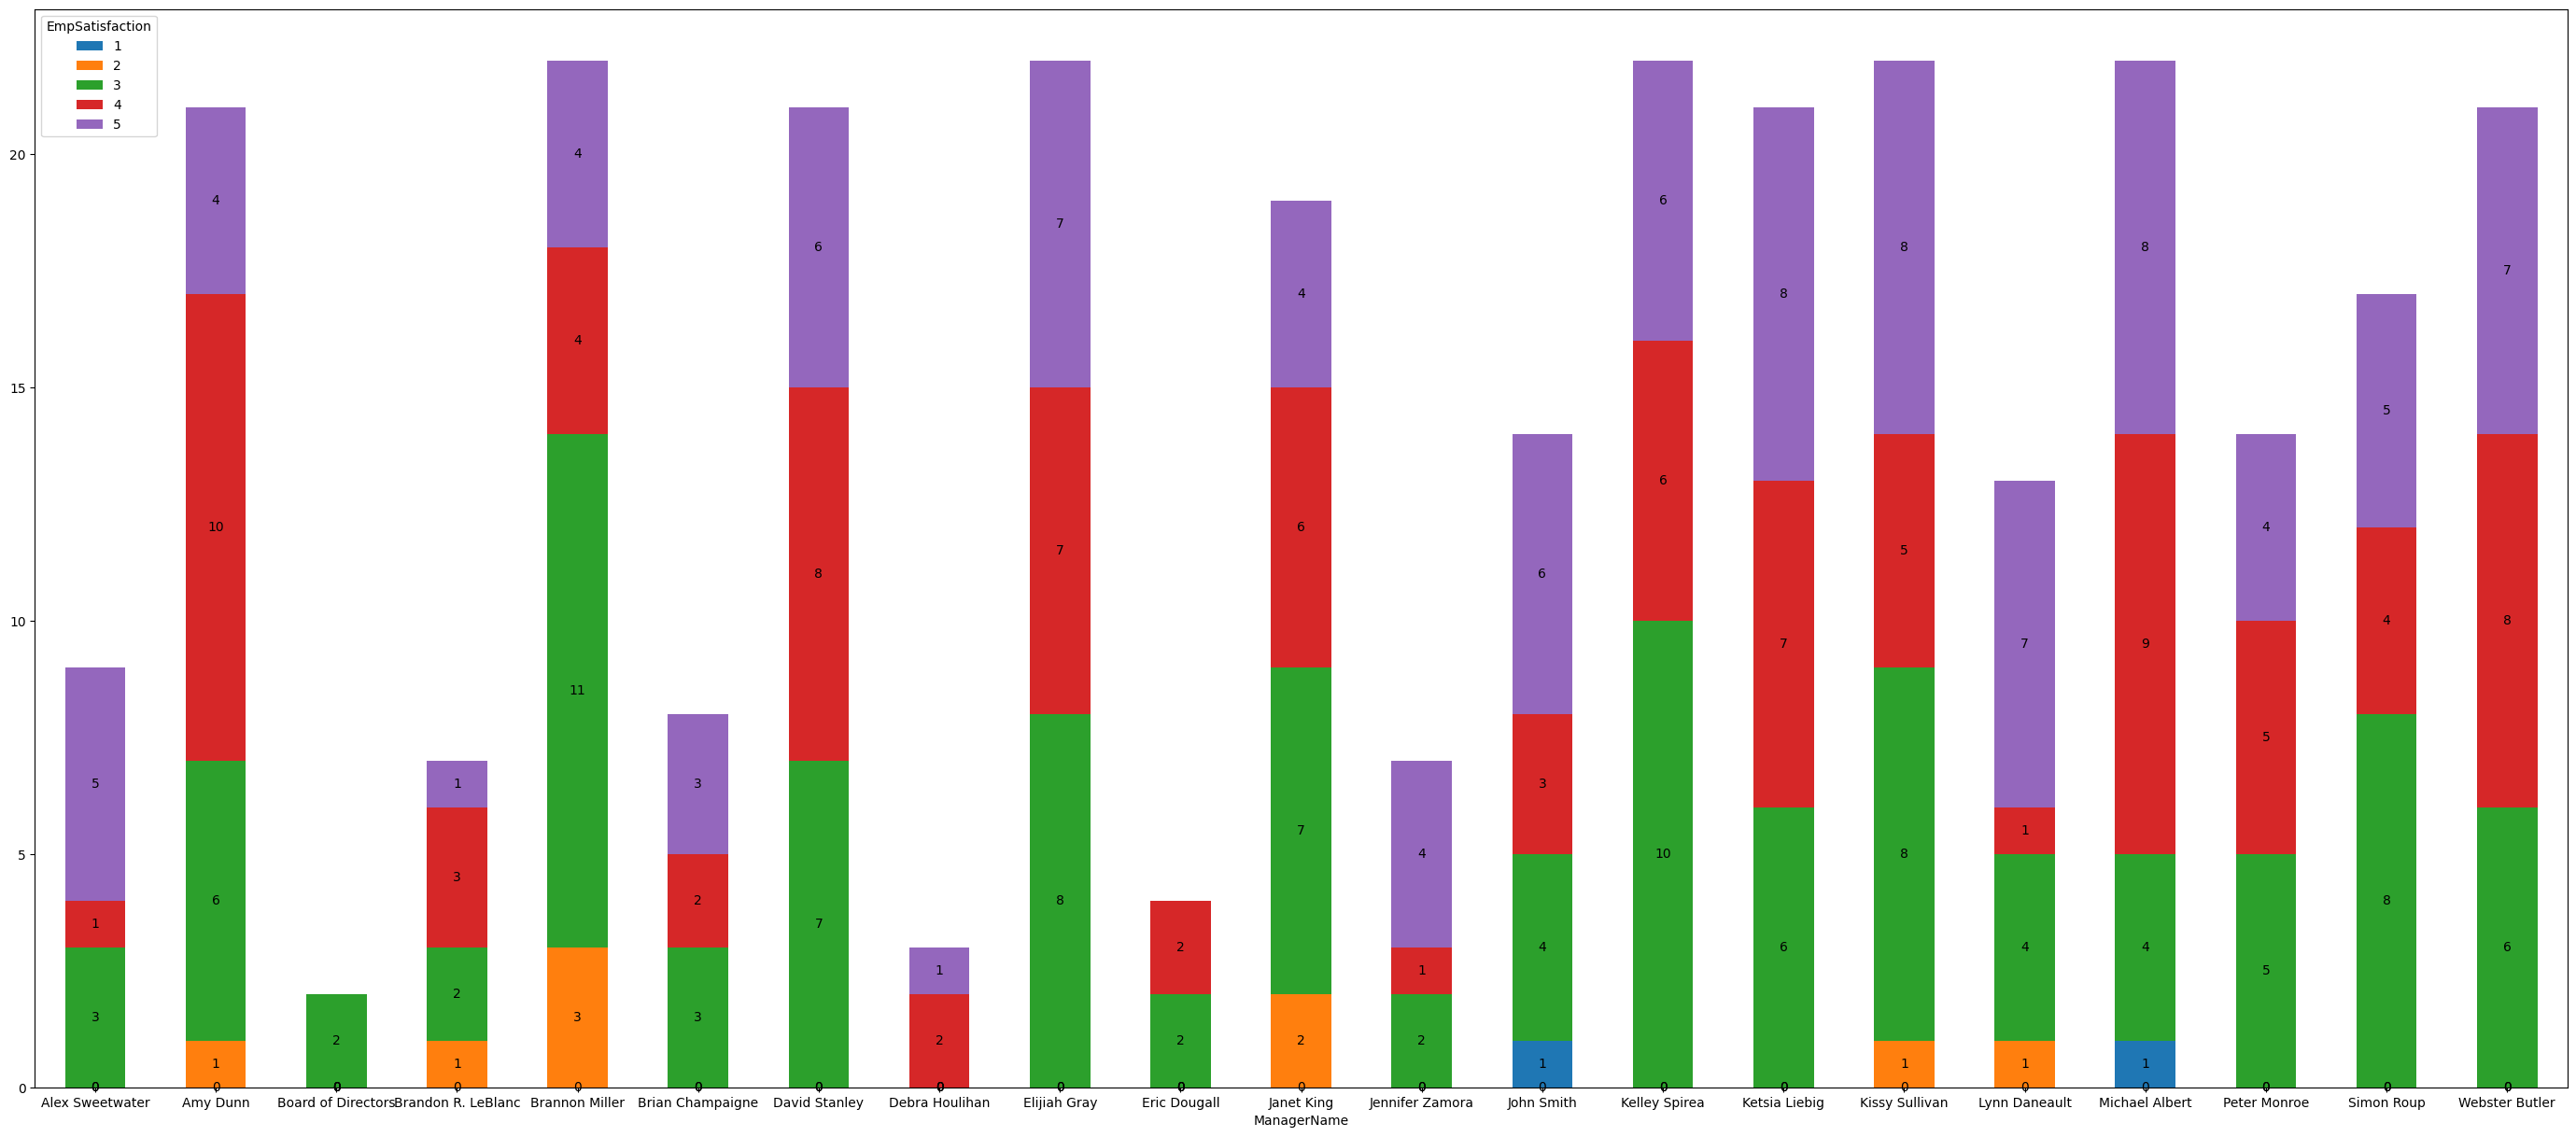

In [142]:
JobSourceVSPerfScore = pd.crosstab(HRdata.ManagerName, HRdata.EmpSatisfaction)

#Plotting bar chart nya
ax = JobSourceVSPerfScore.plot(kind='bar',figsize=(35,15),stacked= True, rot =0, label = True)
for c in ax.containers:
    ax.bar_label(c, label_type='center')

**10.3 Apakah ada pengaruh Manager dengan Engagement Survey Rate**

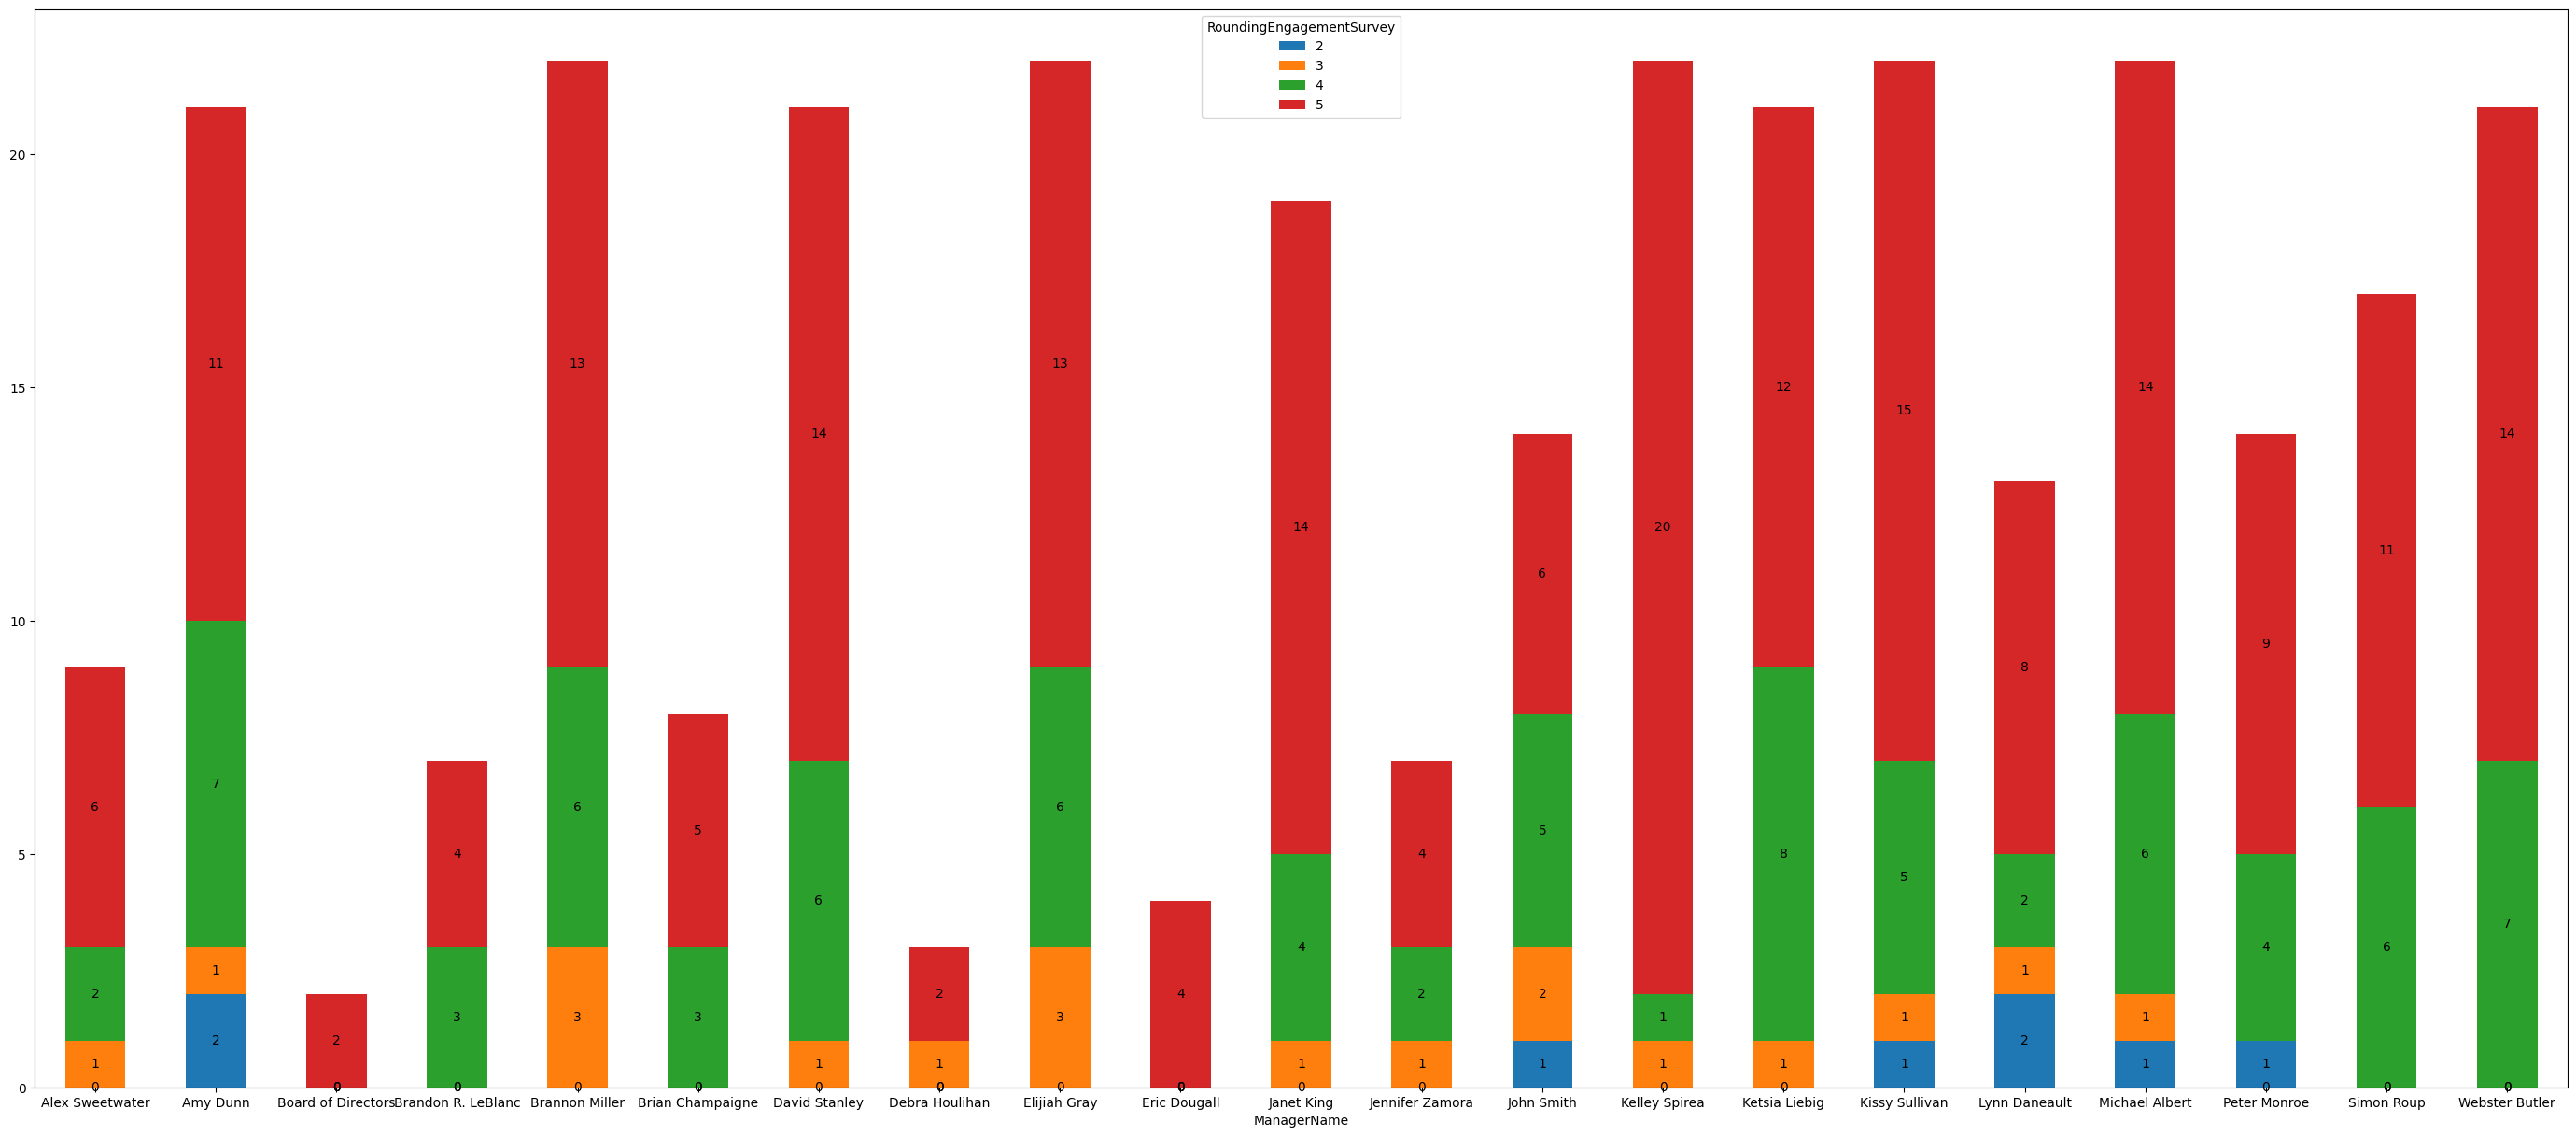

In [143]:
JobSourceVSPerfScore = pd.crosstab(HRdata.ManagerName, HRdata.RoundingEngagementSurvey)

#Plotting bar chart nya
ax = JobSourceVSPerfScore.plot(kind='bar',figsize=(35,15),stacked= True, rot =0, label = True)
for c in ax.containers:
    ax.bar_label(c, label_type='center')

# Menggunakan Analisis MANOVA

In [115]:
# Menampilkan nilai unik dari kolom 'Manager'
print("Nilai unik dari kolom 'Department':", HRdata['ManagerName'].unique())

Nilai unik dari kolom 'Department': ['Michael Albert' 'Simon Roup' 'Kissy Sullivan' 'Elijiah Gray'
 'Webster Butler' 'Amy Dunn' 'Alex Sweetwater' 'Ketsia Liebig'
 'Brannon Miller' 'Peter Monroe' 'David Stanley' 'Kelley Spirea'
 'Brandon R. LeBlanc' 'Janet King' 'John Smith' 'Jennifer Zamora'
 'Lynn Daneault' 'Eric Dougall' 'Debra Houlihan' 'Brian Champaigne'
 'Board of Directors']


In [116]:
# Menggunakan metode factorize untuk mentransformasi nilai unik kolom Department menjadi angka
HRdata['ManagerNameNumeric'], unique_manager = pd.factorize(HRdata['ManagerName'])

# Menampilkan hasil transformasi
print("Nilai unik dari kolom 'Department' setelah diubah menjadi numerik:")
print(unique_manager)
print("Data setelah transformasi:")
print(HRdata[['ManagerName', 'ManagerNameNumeric']])


Nilai unik dari kolom 'Department' setelah diubah menjadi numerik:
Index(['Michael Albert', 'Simon Roup', 'Kissy Sullivan', 'Elijiah Gray',
       'Webster Butler', 'Amy Dunn', 'Alex Sweetwater', 'Ketsia Liebig',
       'Brannon Miller', 'Peter Monroe', 'David Stanley', 'Kelley Spirea',
       'Brandon R. LeBlanc', 'Janet King', 'John Smith', 'Jennifer Zamora',
       'Lynn Daneault', 'Eric Dougall', 'Debra Houlihan', 'Brian Champaigne',
       'Board of Directors'],
      dtype='object')
Data setelah transformasi:
        ManagerName  ManagerNameNumeric
0    Michael Albert                   0
1        Simon Roup                   1
2    Kissy Sullivan                   2
3      Elijiah Gray                   3
4    Webster Butler                   4
..              ...                 ...
306  Kissy Sullivan                   2
307  Brannon Miller                   8
308      Janet King                  13
309      Simon Roup                   1
310   David Stanley                  10

In [118]:
#from statsmodels.multivariate.manova import MANOVA
#from sklearn.datasets import load_iris
#import statsmodels.api as sm
#from statsmodels.multivariate.manova import MANOVA

# Variabel dependen (PerformanceScore, EmpSatisfaction, EngagementSurvey)
dependent_variables = HRdata[['PerformanceScoreNumeric', 'EmpSatisfaction', 'EngagementSurveyNumericFromFloat']]

# Variabel independen (ManagerName)
manager_influence = pd.get_dummies(HRdata['ManagerNameNumeric'], drop_first=False)
manager_influence = manager_influence[manager_influence.columns[0:]].replace({True:1,False:0})

# Melakukan analisis MANOVA
manova_model = MANOVA(exog=dependent_variables.to_numpy(), endog=months_recruitment.to_numpy())

/tmp/ipykernel_33/425337962.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


In [126]:
# Mengecek data-data pada kolom variabel dependen nya 
dependent_variables

,PerformanceScoreNumeric,EmpSatisfaction,EngagementSurveyNumericFromFloat
0,4,5,4
1,3,3,4
2,3,3,3
3,3,5,4
4,3,4,5
...,...,...,...
306,3,4,4
307,1,2,3
308,4,5,4
309,3,3,5


In [125]:
# Perhitungan MANOVA nya
print(manova_model.mv_test())

                  Multivariate linear model
                                                             
-------------------------------------------------------------
           x0           Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.8309 6.0000 303.0000 10.2742 0.0000
         Pillai's trace 0.1691 6.0000 303.0000 10.2742 0.0000
 Hotelling-Lawley trace 0.2035 6.0000 303.0000 10.2742 0.0000
    Roy's greatest root 0.2035 6.0000 303.0000 10.2742 0.0000
-------------------------------------------------------------
                                                             
-------------------------------------------------------------
           x1           Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.7706 6.0000 303.0000 15.0293 0.0000
         Pillai's trace 0.2294 6.0000 303.0000 15.0293 0.0000
 Hotelling-Lawley trace 0.

**Berdasarkan hasil MANOVA diatas, terlihat bahwa ketiga p-value dari 3 variabel dependen tsb kurang dari 0,05. Maka dapat disimpulkan bahwasannya terdapat pengaruh ketiga variabel tsb terhadap bulan perusahaan melakukan rekrutmen**

# 11. Apakah ada pengaruh sumber platform rekrutmen dengan performance score, employee satisfaction, dan engagement survey ?

**Jawaban nomor 16.1, apakah ada pengaruh platform sumber rekrutmen dengan Performance Score**

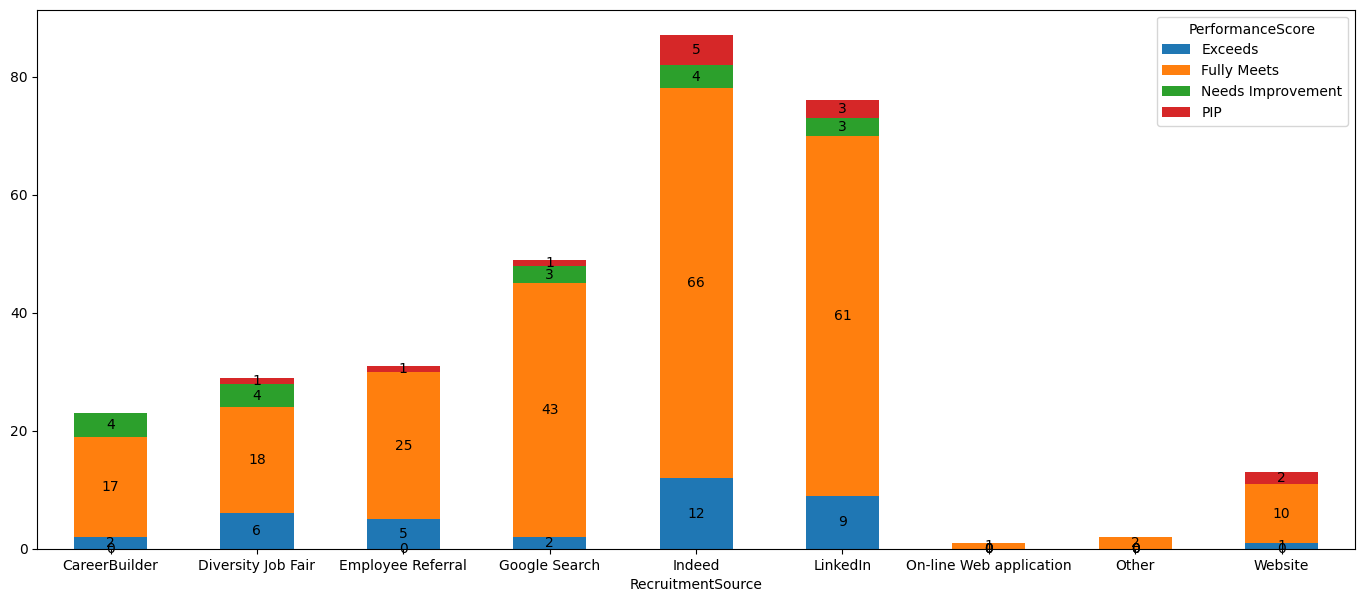

In [160]:
JobSourceVSPerfScore = pd.crosstab(HRdata.RecruitmentSource, HRdata.PerformanceScore)

#Plotting bar chart nya
ax = JobSourceVSPerfScore.plot(kind='bar',figsize=(17,7),stacked= True, rot =0, label = True)
for c in ax.containers:
    ax.bar_label(c, label_type='center')

**Jawaban nomor 16.2, apakah ada pengaruh platform sumber rekrutmen dengan Satisfaction karyawan**

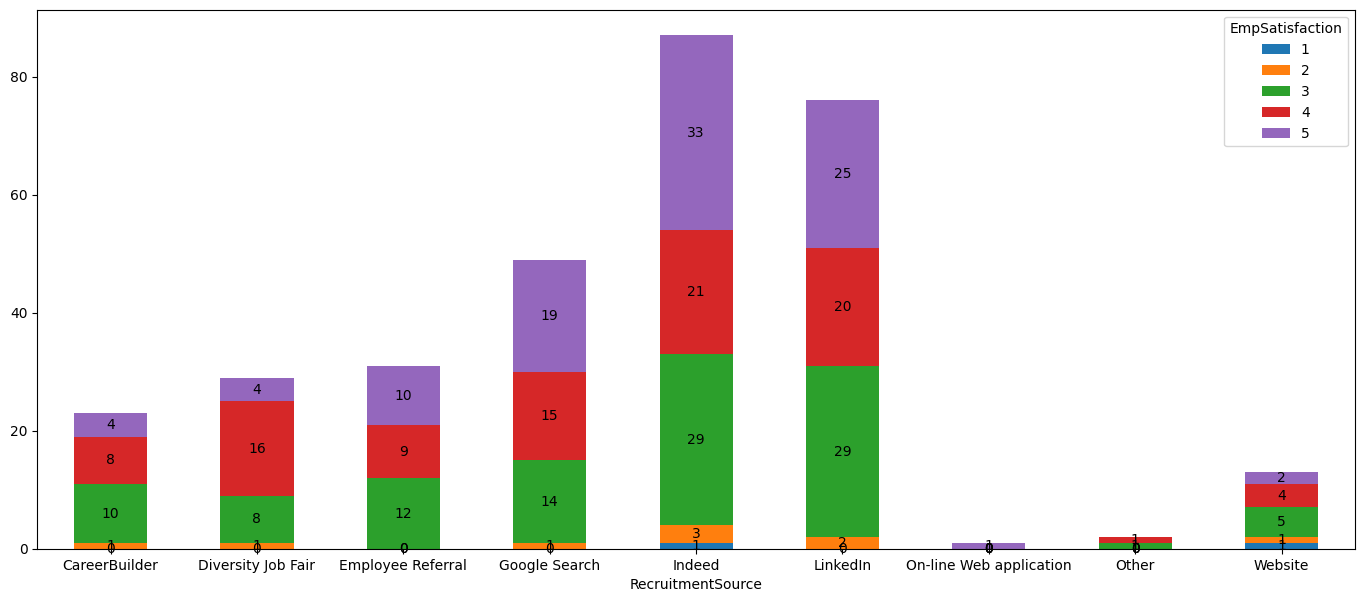

In [161]:
JobSourceVSPerfScore = pd.crosstab(HRdata.RecruitmentSource, HRdata.EmpSatisfaction)

#Plotting bar chart nya
ax = JobSourceVSPerfScore.plot(kind='bar',figsize=(17,7),stacked= True, rot =0, label = True)
for c in ax.containers:
    ax.bar_label(c, label_type='center')

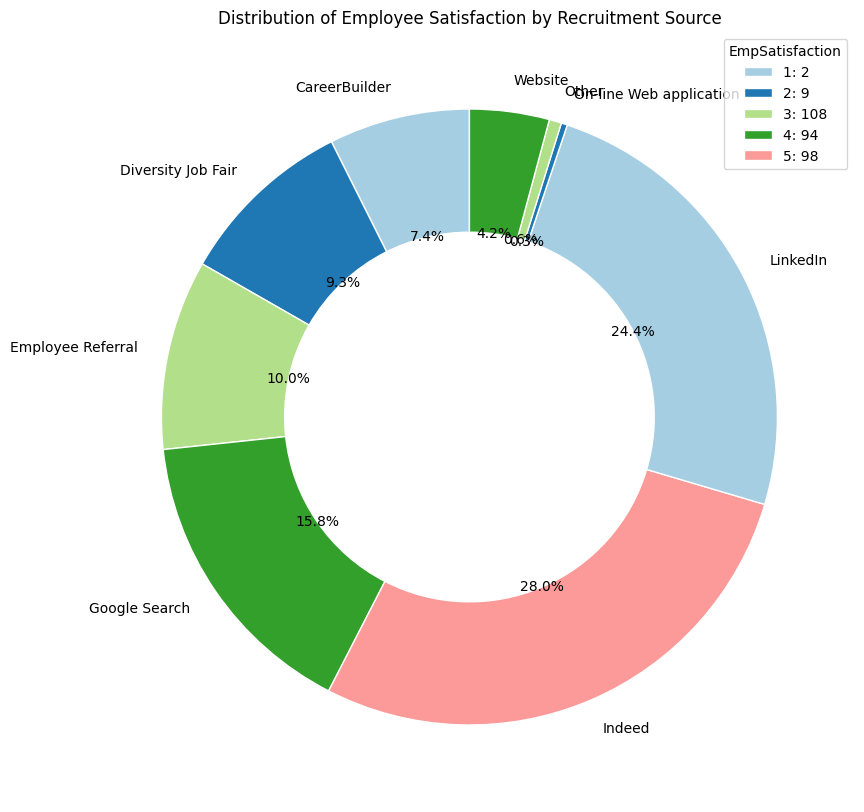

In [162]:
import matplotlib.pyplot as plt

# Membuat tabel silang
JobSourceVSPerfScore = pd.crosstab(HRdata.RecruitmentSource, HRdata.EmpSatisfaction)

# Menentukan warna untuk pie chart
colors = plt.cm.Paired(range(len(JobSourceVSPerfScore.columns)))

# Membuat pie chart
fig, ax = plt.subplots(figsize=(10, 10))
wedges, texts, autotexts = ax.pie(JobSourceVSPerfScore.sum(axis=1), labels=JobSourceVSPerfScore.index, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.4, edgecolor='w'))

# Menambahkan legend
legend_labels = [f'{label}: {value}' for label, value in zip(JobSourceVSPerfScore.columns, JobSourceVSPerfScore.sum(axis=0))]
ax.legend(wedges, legend_labels, title='EmpSatisfaction')

# Menambahkan judul
plt.title('Distribution of Employee Satisfaction by Recruitment Source')

# Menampilkan pie chart
plt.show()


**Jawaban nomor 16.3, apakah ada pengaruh platform sumber rekrutmen dengan Engagement Survey Rate**

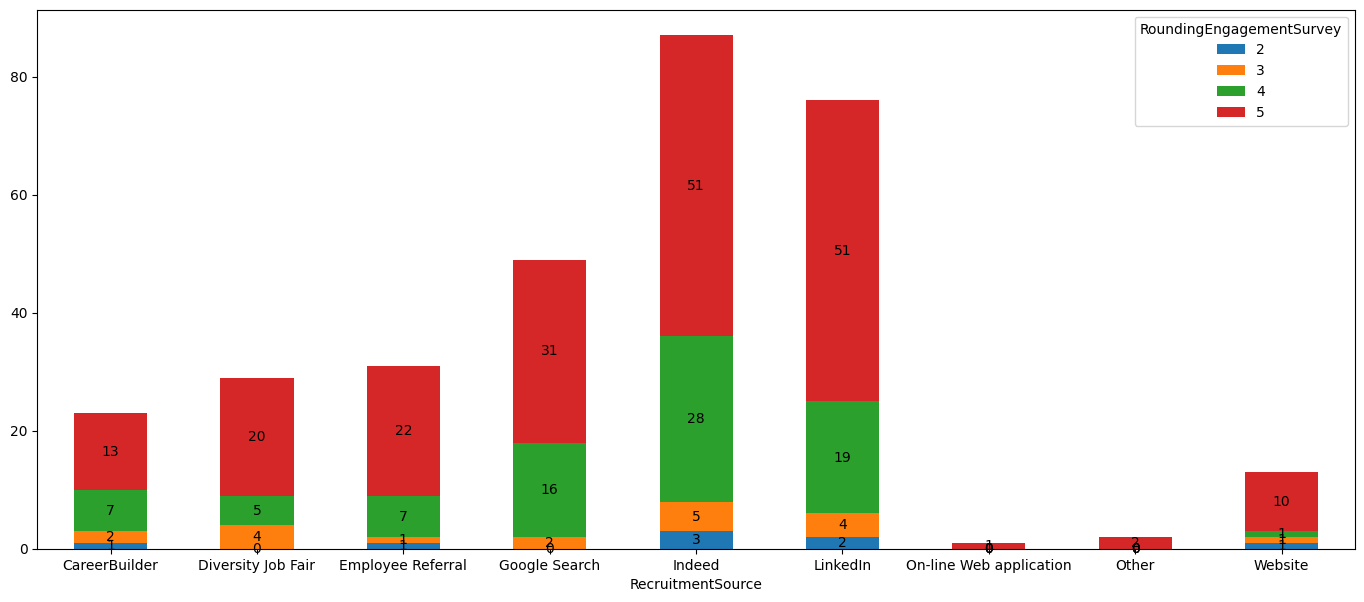

In [163]:
JobSourceVSPerfScore = pd.crosstab(HRdata.RecruitmentSource, HRdata.RoundingEngagementSurvey)

#Plotting bar chart nya
ax = JobSourceVSPerfScore.plot(kind='bar',figsize=(17,7),stacked= True, rot =0, label = True)
for c in ax.containers:
    ax.bar_label(c, label_type='center')

**Jawaban nomor 16.4, Apakah ada pengaruh platform loker dengan Lama waktu bekerja karyawan**

In [131]:
#import pandas as pd
from datetime import datetime

# Mengganti nilai "0" di kolom 'DateofTermination' dengan tanggal saat ini
HRdata['DateofTermination'] = HRdata['DateofTermination'].replace('0', datetime.now())

# Konversi kolom 'DateofHire' dan 'DateofTermination' ke format datetime
HRdata['DateofHire'] = pd.to_datetime(HRdata['DateofHire'])
HRdata['DateofTermination'] = pd.to_datetime(HRdata['DateofTermination'])

# Buat kolom baru 'LengthofEmployment' yang menyatakan lama bekerja
HRdata['LengthofEmployment'] = HRdata['DateofTermination'] - HRdata['DateofHire']

# Tampilkan hasil
print(HRdata[['DateofHire', 'DateofTermination', 'LengthofEmployment']])


    DateofHire          DateofTermination        LengthofEmployment
0   2011-07-05 2024-03-18 02:55:57.101730 4640 days 02:55:57.101730
1   2015-03-30 2016-06-16 00:00:00.000000         444 days 00:00:00
2   2011-07-05 2012-09-24 00:00:00.000000         447 days 00:00:00
3   2008-01-07 2024-03-18 02:55:57.101730 5915 days 02:55:57.101730
4   2011-07-11 2016-09-06 00:00:00.000000        1884 days 00:00:00
..         ...                        ...                       ...
306 2014-07-07 2024-03-18 02:55:57.101730 3542 days 02:55:57.101730
307 2008-09-02 2015-09-29 00:00:00.000000        2583 days 00:00:00
308 2010-04-10 2024-03-18 02:55:57.101730 5091 days 02:55:57.101730
309 2015-03-30 2024-03-18 02:55:57.101730 3276 days 02:55:57.101730
310 2014-09-29 2024-03-18 02:55:57.101730 3458 days 02:55:57.101730

[311 rows x 3 columns]


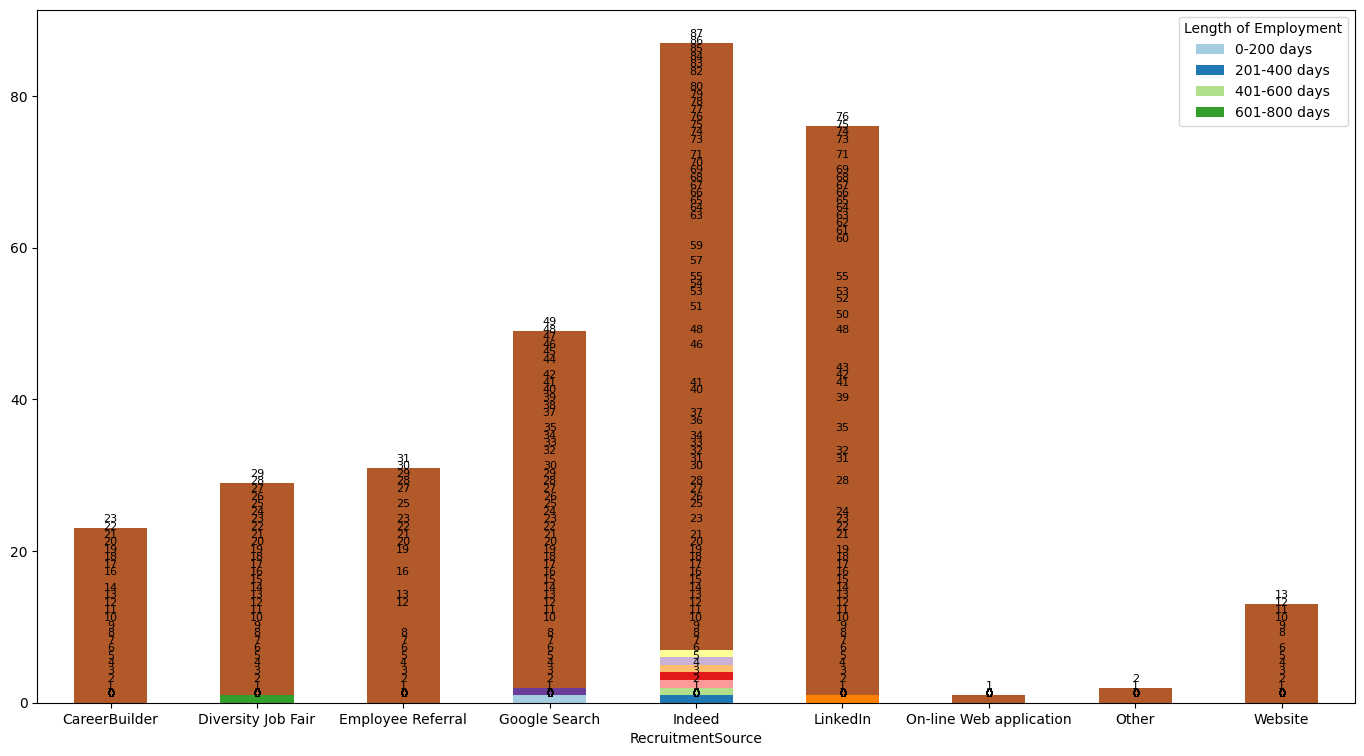

In [132]:
# Membuat tabel silang
JobSourceVSLengthofEmployment = pd.crosstab(HRdata.RecruitmentSource, HRdata.LengthofEmployment)

# Plotting bar chart
fig, ax = plt.subplots(figsize=(17, 9))
colors = plt.cm.Paired(range(len(JobSourceVSLengthofEmployment.columns)))

JobSourceVSLengthofEmployment.plot(kind='bar', stacked=True, rot=0, ax=ax, color=colors)

# Menambahkan label untuk bar chart
for c in ax.containers:
    ax.bar_label(c, label_type='edge', fontsize=8, color='black', padding=3, fmt='%.0f')

# Menambahkan legend dengan pembulatan
legend_labels = ['0-200 days', '201-400 days', '401-600 days','601-800 days']
ax.legend(legend_labels, title='Length of Employment', title_fontsize='10')

# Menampilkan plot
plt.show()


# Cek Korelasi Antar Kolom

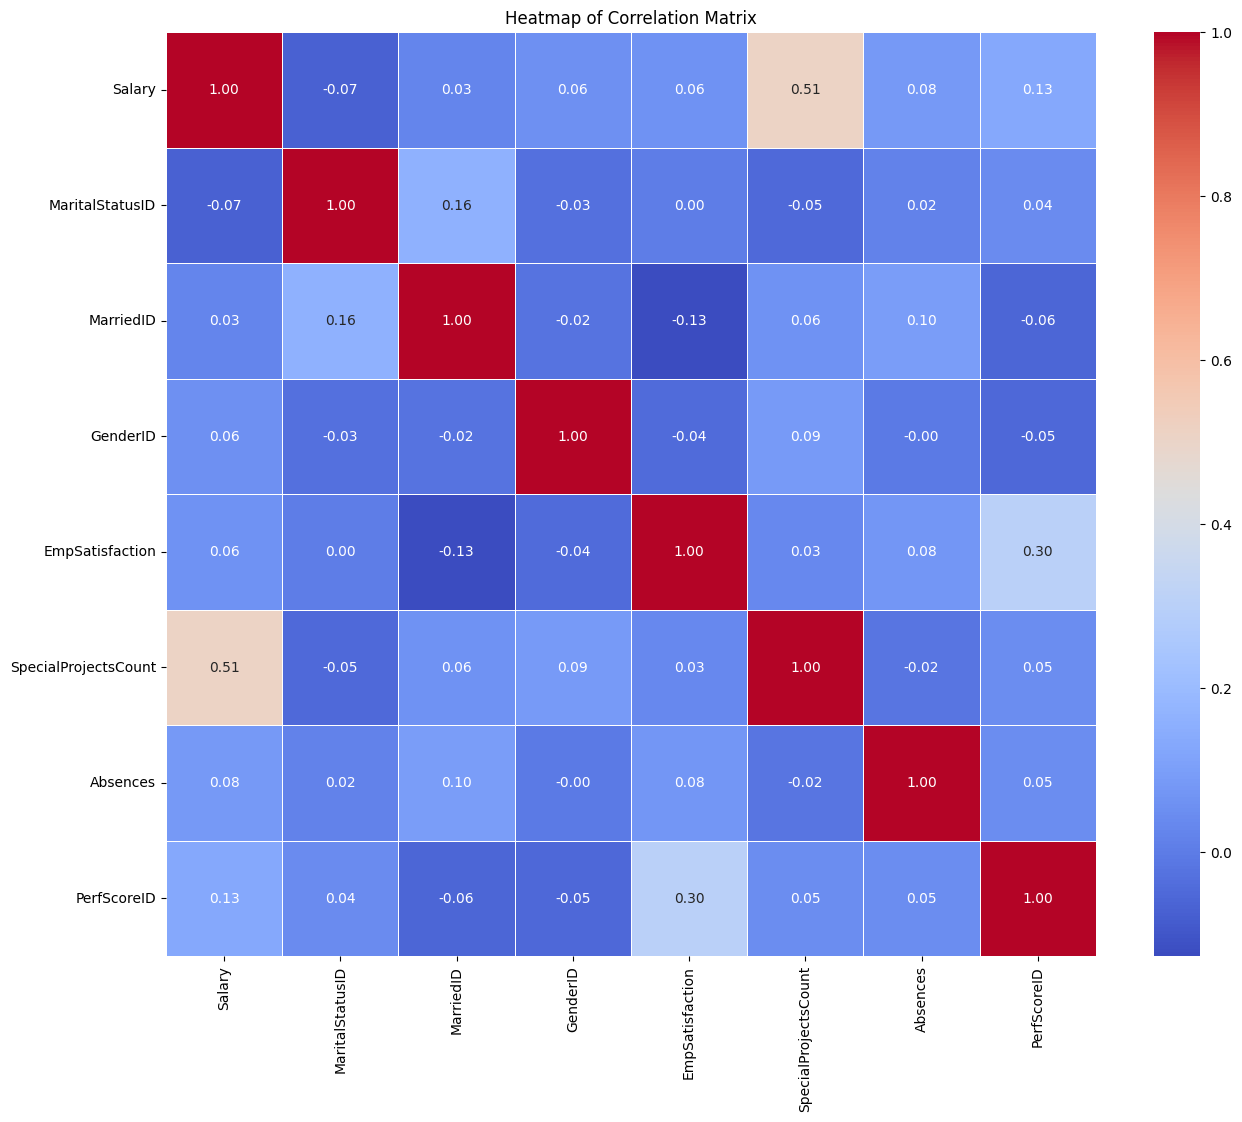

In [166]:
#DARI CHATGPT

plt.figure(figsize=(15, 12))

# Memilih kolom-kolom yang relevan untuk heatmap
selected_columns = ['Salary', 'MaritalStatusID','MarriedID','GenderID','EmpSatisfaction','SpecialProjectsCount','Absences','PerfScoreID']

# Membuat heatmap
sns.heatmap(HRdata[selected_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Menambahkan judul
plt.title('Heatmap of Correlation Matrix')

# Menampilkan heatmap
plt.show()


# Menggunakan Analisis MANOVA

In [127]:
# Menampilkan nilai unik dari kolom 'RecruitmentSource'
print("Nilai unik dari kolom 'RecruitmentSource':", HRdata['RecruitmentSource'].unique())

Nilai unik dari kolom 'RecruitmentSource': ['LinkedIn' 'Indeed' 'Google Search' 'Employee Referral'
 'Diversity Job Fair' 'On-line Web application' 'CareerBuilder' 'Website'
 'Other']


In [129]:
# Menggunakan metode factorize untuk mentransformasi nilai unik kolom RecruitmentSource menjadi angka
HRdata['RecruitmentSourceNumeric'], unique_recsource = pd.factorize(HRdata['RecruitmentSource'])

# Menampilkan hasil transformasi
print("Nilai unik dari kolom 'RecruitmentSource' setelah diubah menjadi numerik:")
print(unique_recsource)
print("Data setelah transformasi:")
print(HRdata[['RecruitmentSource', 'RecruitmentSourceNumeric']])


Nilai unik dari kolom 'RecruitmentSource' setelah diubah menjadi numerik:
Index(['LinkedIn', 'Indeed', 'Google Search', 'Employee Referral',
       'Diversity Job Fair', 'On-line Web application', 'CareerBuilder',
       'Website', 'Other'],
      dtype='object')
Data setelah transformasi:
     RecruitmentSource  RecruitmentSourceNumeric
0             LinkedIn                         0
1               Indeed                         1
2             LinkedIn                         0
3               Indeed                         1
4        Google Search                         2
..                 ...                       ...
306           LinkedIn                         0
307      Google Search                         2
308  Employee Referral                         3
309  Employee Referral                         3
310           LinkedIn                         0

[311 rows x 2 columns]


In [135]:
# Menampilkan semua kolom beserta tipe datanya
print(HRdata.dtypes)

Employee_Name                                object
EmpID                                         int64
MarriedID                                     int64
MaritalStatusID                               int64
GenderID                                      int64
EmpStatusID                                   int64
DeptID                                        int64
PerfScoreID                                   int64
FromDiversityJobFairID                        int64
Salary                                        int64
Termd                                         int64
PositionID                                    int64
Position                                     object
State                                        object
Zip                                           int64
DOB                                          object
Sex                                          object
MaritalDesc                                  object
CitizenDesc                                  object
HispanicLati

In [137]:
# Hitung jumlah hari dalam timedelta dan konversi ke dalam bulan
HRdata['LengthofEmploymentNumeric'] = HRdata['LengthofEmployment'].dt.days / 30.44  # Rata-rata jumlah hari dalam sebulan

# Tampilkan hasil konversi
print(HRdata['LengthofEmploymentNumeric'])


0      152.431012
1       14.586071
2       14.684625
3      194.316689
4       61.892247
          ...    
306    116.360053
307     84.855453
308    167.247043
309    107.621551
310    113.600526
Name: LengthofEmploymentNumeric, Length: 311, dtype: float64


In [139]:
#from statsmodels.multivariate.manova import MANOVA
#from sklearn.datasets import load_iris
#import statsmodels.api as sm
#from statsmodels.multivariate.manova import MANOVA

# Variabel dependen (PerformanceScore, EmpSatisfaction, EngagementSurvey, LengthofEmployment)
dependent_variables = HRdata[['PerformanceScoreNumeric', 'EmpSatisfaction', 'EngagementSurveyNumericFromFloat', 'LengthofEmploymentNumeric']]

# Variabel independen (recruitment_source)
recruitment_source = pd.get_dummies(HRdata['RecruitmentSourceNumeric'], drop_first=False)
recruitment_source = recruitment_source[recruitment_source.columns[0:]].replace({True:1,False:0})

# Melakukan analisis MANOVA
manova_model = MANOVA(exog=dependent_variables.to_numpy(), endog=months_recruitment.to_numpy())

/tmp/ipykernel_33/2388601606.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


In [141]:
# Mengecek data-data pada kolom variabel dependen nya 
dependent_variables

,PerformanceScoreNumeric,EmpSatisfaction,EngagementSurveyNumericFromFloat,LengthofEmploymentNumeric
0,4,5,4,152.431012
1,3,3,4,14.586071
2,3,3,3,14.684625
3,3,5,4,194.316689
4,3,4,5,61.892247
...,...,...,...,...
306,3,4,4,116.360053
307,1,2,3,84.855453
308,4,5,4,167.247043
309,3,3,5,107.621551


In [140]:
# Perhitungan MANOVA nya
print(manova_model.mv_test())

                  Multivariate linear model
                                                             
-------------------------------------------------------------
           x0           Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.8682 6.0000 302.0000  7.6397 0.0000
         Pillai's trace 0.1318 6.0000 302.0000  7.6397 0.0000
 Hotelling-Lawley trace 0.1518 6.0000 302.0000  7.6397 0.0000
    Roy's greatest root 0.1518 6.0000 302.0000  7.6397 0.0000
-------------------------------------------------------------
                                                             
-------------------------------------------------------------
           x1           Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.7758 6.0000 302.0000 14.5432 0.0000
         Pillai's trace 0.2242 6.0000 302.0000 14.5432 0.0000
 Hotelling-Lawley trace 0.

**Berdasarkan hasil MANOVA diatas, terlihat bahwa keempat p-value dari 4 variabel dependen tsb kurang dari 0,05. Maka dapat disimpulkan bahwasannya terdapat pengaruh ketiga variabel tsb terhadap bulan perusahaan melakukan rekrutmen**